## $\delta^{13}$C$_{\mathrm{BF}}$ vs. $\delta^{18}$O$_{\mathrm{BF}}$

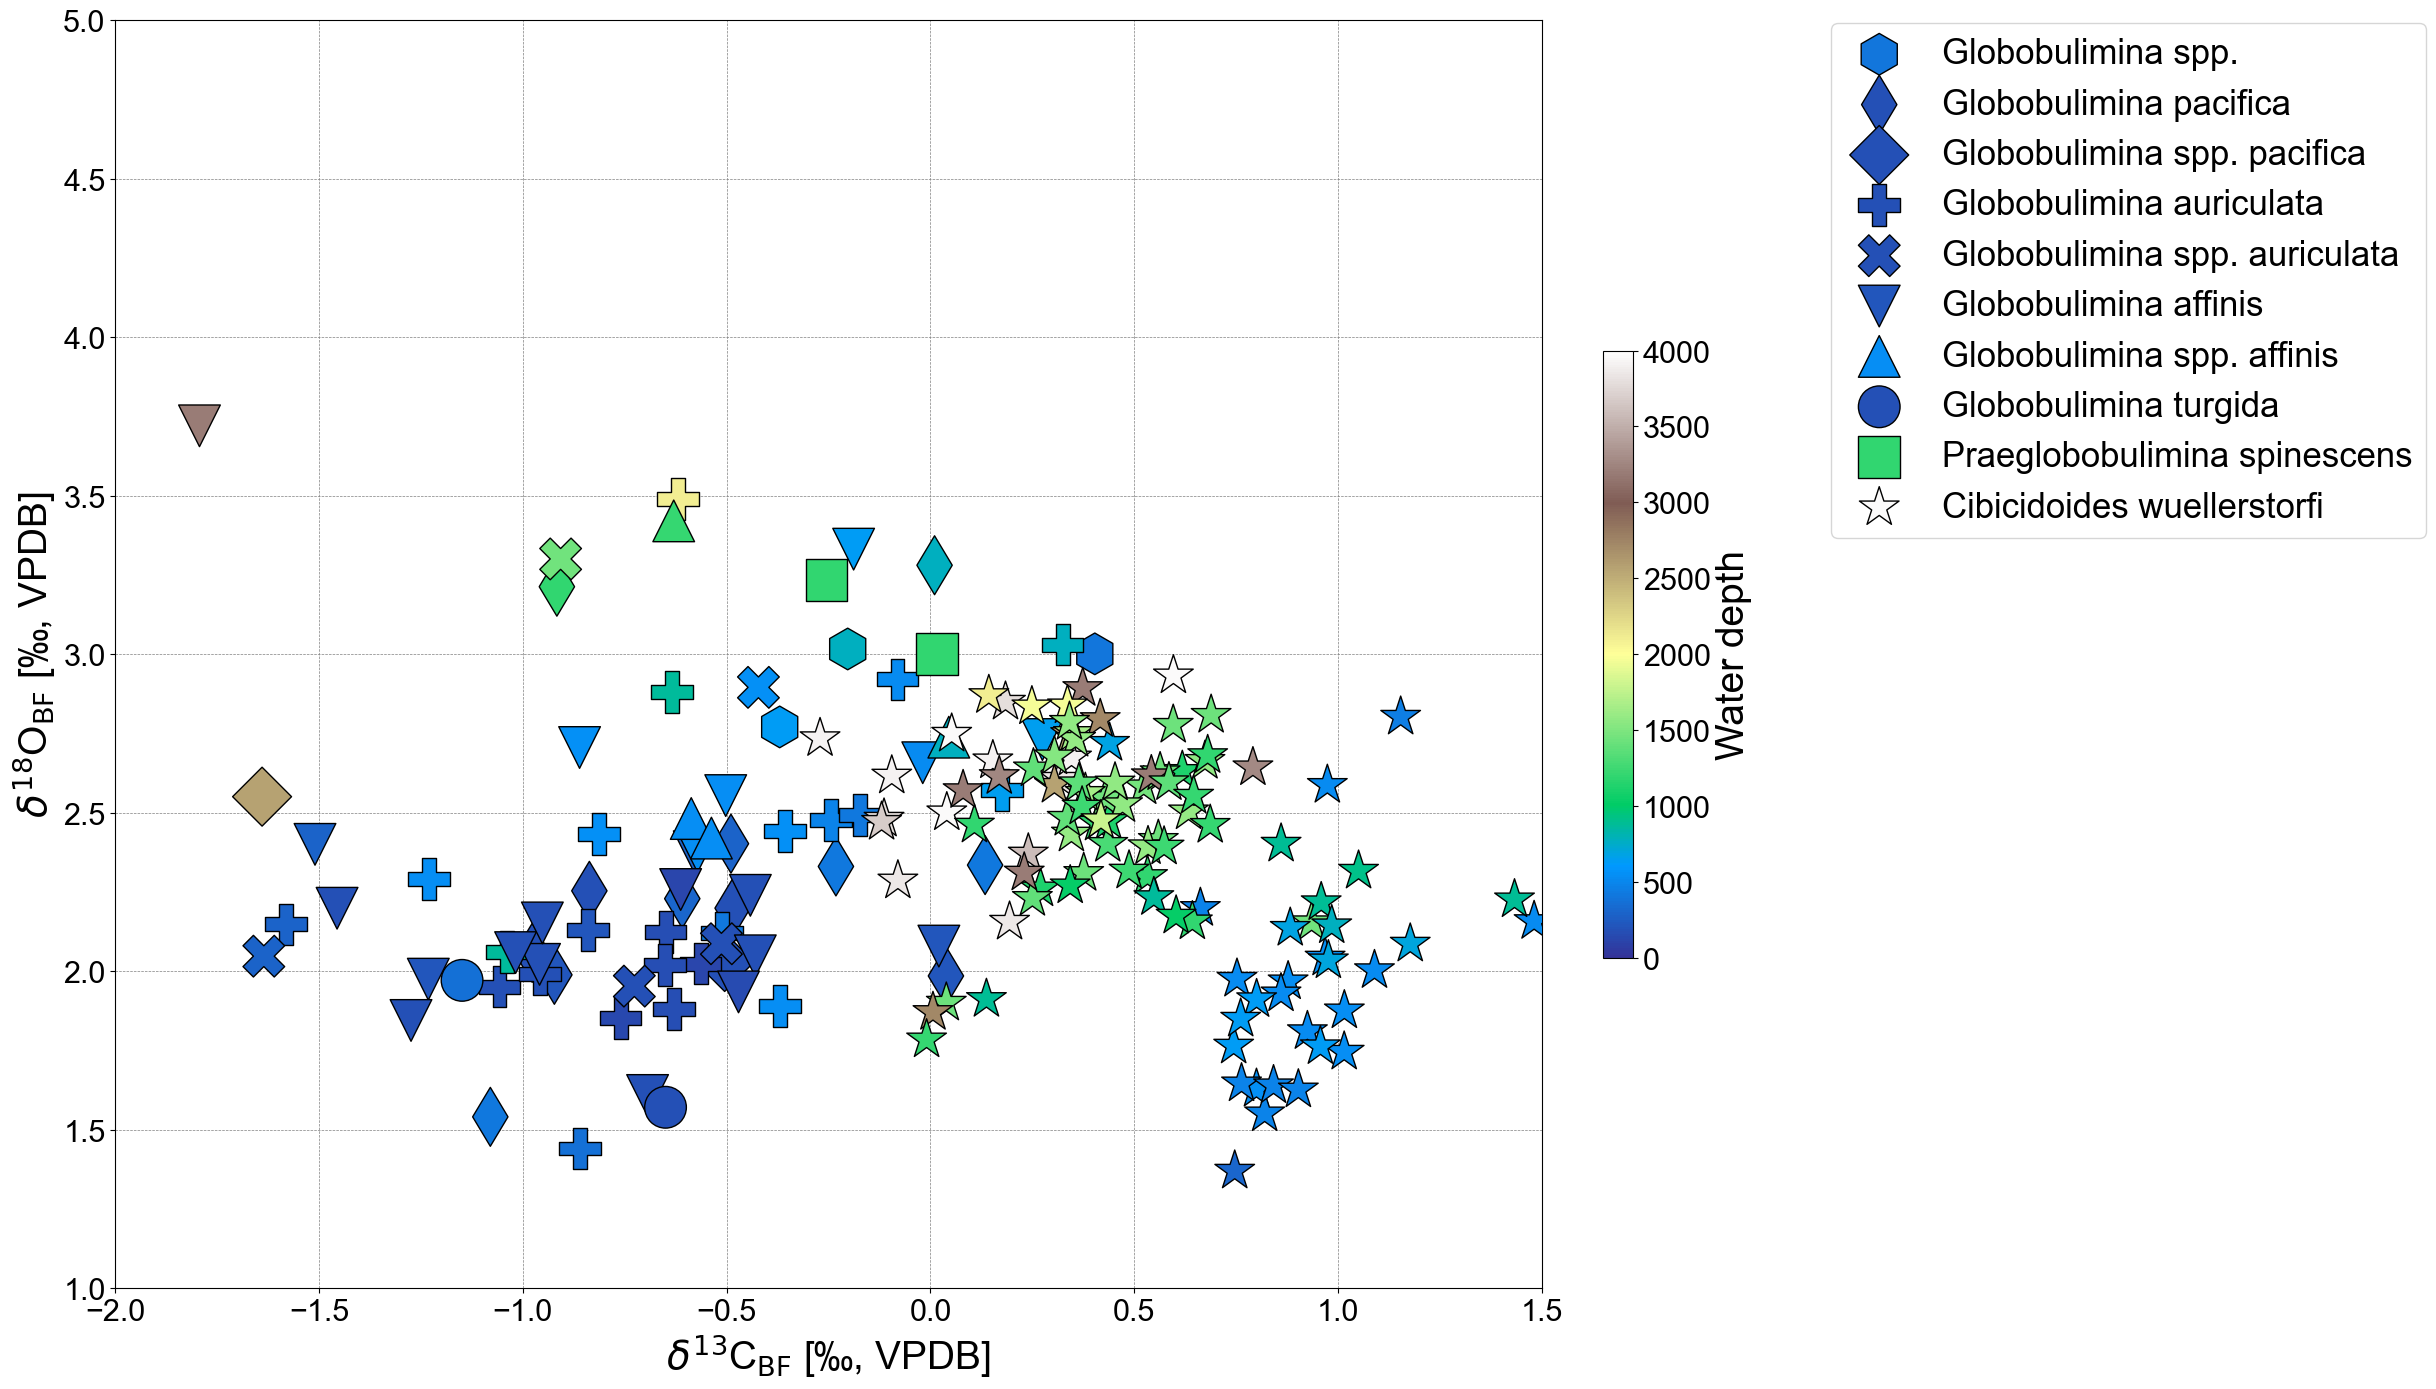

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Convert 'd13C VPDB corr' column to numeric, coercing any errors to NaN
df['d13C VPDB corr'] = pd.to_numeric(df['d13C VPDB corr'], errors='coerce')
df = df[df['Interglacial/glacial'] == 'Interglacial']

# Drop rows where 'd13C VPDB corr' has NaNs
df.dropna(subset=['d13C VPDB corr'], inplace=True)

# Calculate the difference and add it as a new column in the DataFrame
df['d18O_diff'] = df['d18O VPDB corr'] - df['d18Oec_mn_h2022']

# Filter the DataFrame to only include rows where species type is 'Epifaunal'
epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Epifaunal']

# Merge this filtered 'Epifaunal' DataFrame back into the original DataFrame
non_epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Epifaunal']
df = pd.concat([epifaunal, non_epifaunal])

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Check if the necessary columns exist in the DataFrame
if 'oxygen_h2023' in df.columns and 'd13C VPDB corr' in df.columns and 'Species' in df.columns and 'Water depth' in df.columns:

    # Create a dictionary to map species to different marker styles
    species_markers = {
        'Globobulimina spp.': 'h',           
        'Globobulimina pacifica': 'd',        
        'Globobulimina spp. pacifica': 'D',   
        'Globobulimina auriculata': 'P',      
        'Globobulimina spp. auriculata': 'X', 
        'Globobulimina affinis': 'v',         
        'Globobulimina spp. affinis': '^',    
        'Globobulimina turgida': 'o',         # Plus
        'Praeglobobulimina spinescens': 's',  # Triangle right
        'Cibicidoides wuellerstorfi': '*',    # Hexagon
    }

    # Normalize the 'Water depth' column to get colors
    #norm = plt.Normalize(df['Water depth'].min(), df['Water depth'].max())
    norm = plt.Normalize(0, 4000)
    cmap = plt.cm.terrain

    # Create a scatter plot comparing 'd13C VPDB corr' with 'd18O VPDB corr'
    fig, ax = plt.subplots(figsize=(25, 14))  # Making the figure a bit larger to accommodate the legend

    scatter_list = []

    # Plot each species with a specific marker and color based on 'Water depth'
    for species, marker in species_markers.items():
        species_data = df[df['Species'] == species]
        sc = ax.scatter(
            species_data['d13C VPDB corr'], 
            species_data['d18O VPDB corr'], 
            c=species_data['Water depth'], 
            cmap=cmap, 
            marker=marker, 
            s=900, 
            zorder=15,
            label=species,
            edgecolor='black',  # Adding edgecolor to make shapes more distinguishable
            norm=norm  # Ensure the normalization is applied here
        )
        scatter_list.append(sc)
    
    # Add a title and labels to the axes
    ax.set_xlabel(r'$\delta^{13}$C$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=28)
    ax.set_ylabel(r'$\delta^{18}$O$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=28)
    ax.tick_params(axis='both', labelsize=22)
    
    # Set x-axis limits
    ax.set_xlim(-2, 1.5)
    ax.set_ylim(1, 5)
    
    # Place the legend outside the plot
    ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.1, fontsize=25)

    # Create a colorbar
    cbar = fig.colorbar(scatter_list[0], ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Water depth', fontsize=28)
    cbar.ax.tick_params(labelsize=22)

    # Add grid
    ax.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')

    # Adjust the layout to make room for the legend
    plt.tight_layout()
   
   # Show the plot
    plt.show()

## $\delta^{13}$C$_{\mathrm{BF}}$ vs. $\delta^{18}$O$_{\mathrm{BF}}$, only C. wuellerstorfi

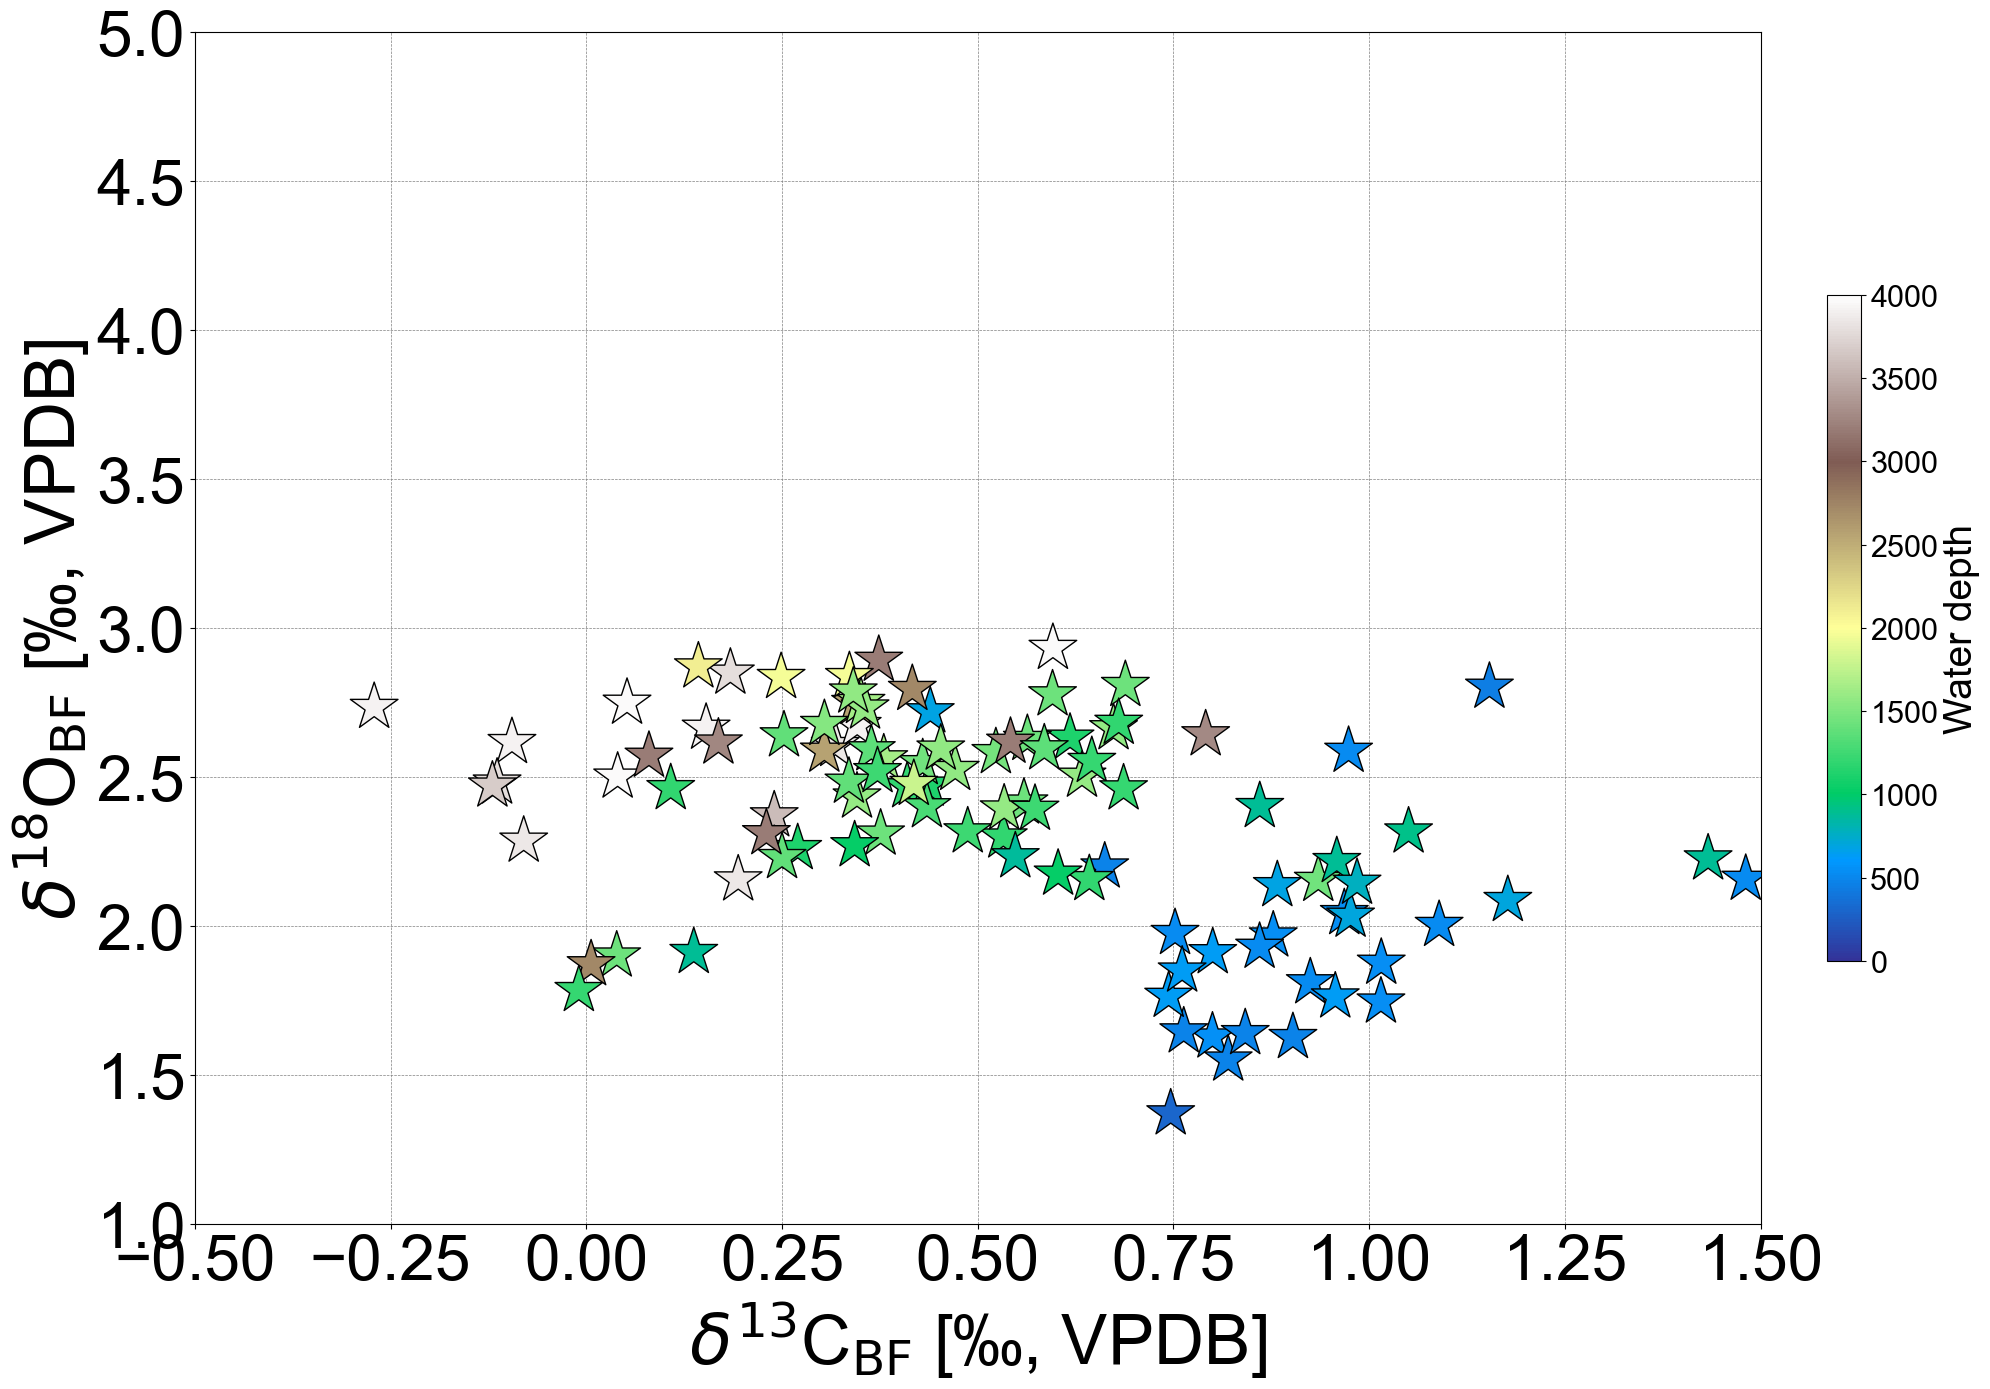

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Convert 'd13C VPDB corr' column to numeric, coercing any errors to NaN
df['d13C VPDB corr'] = pd.to_numeric(df['d13C VPDB corr'], errors='coerce')
df = df[df['Interglacial/glacial'] == 'Interglacial']

# Drop rows where 'd13C VPDB corr' has NaNs
df.dropna(subset=['d13C VPDB corr'], inplace=True)

# Calculate the difference and add it as a new column in the DataFrame
df['d18O_diff'] = df['d18O VPDB corr'] - df['d18Oec_mn_h2022']

# Filter the DataFrame to only include rows where species type is 'Epifaunal'
epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Epifaunal']

# Merge this filtered 'Epifaunal' DataFrame back into the original DataFrame
non_epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Epifaunal']
df = pd.concat([epifaunal, non_epifaunal])

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Check if the necessary columns exist in the DataFrame
if 'oxygen_h2023' in df.columns and 'd13C VPDB corr' in df.columns and 'Species' in df.columns and 'Water depth' in df.columns:
    # Filter the DataFrame for C. wuellerstorfi
    species_data = df[df['Species'] == 'Cibicidoides wuellerstorfi']

    # Normalize the 'Water depth' column to get colors
    norm = plt.Normalize(0, 4000)
    cmap = plt.cm.terrain

    # Create a scatter plot comparing 'd13C VPDB corr' with 'd18O VPDB corr'
    fig, ax = plt.subplots(figsize=(20, 14))  # Making the figure a bit larger to accommodate the legend

    sc = ax.scatter(
        species_data['d13C VPDB corr'], 
        species_data['d18O VPDB corr'], 
        c=species_data['Water depth'], 
        cmap=cmap, 
        marker='*', 
        s=1300, 
        zorder=15,
        label='Cibicidoides wuellerstorfi',
        edgecolor='black',  # Adding edgecolor to make shapes more distinguishable
        norm=norm  # Ensure the normalization is applied here
    )

    # Add a title and labels to the axes
    ax.set_xlabel(r'$\delta^{13}$C$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=50)
    ax.set_ylabel(r'$\delta^{18}$O$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=50)
    ax.tick_params(axis='both', labelsize=46)

    # Set x-axis limits
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(1, 5)
      
    # Place the legend outside the plot
    #ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.1, fontsize=25)

    # Create a colorbar
    cbar = fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Water depth', fontsize=28)
    cbar.ax.tick_params(labelsize=22)

    # Add grid
    ax.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')

    # Adjust the layout to make room for the legend
    plt.tight_layout()
   
     # Show the plot
    plt.show() 

## $\delta^{13}$C$_{\mathrm{BF}}$ vs. $\delta^{18}$O$_{\mathrm{BF}}$, only Globobulimina

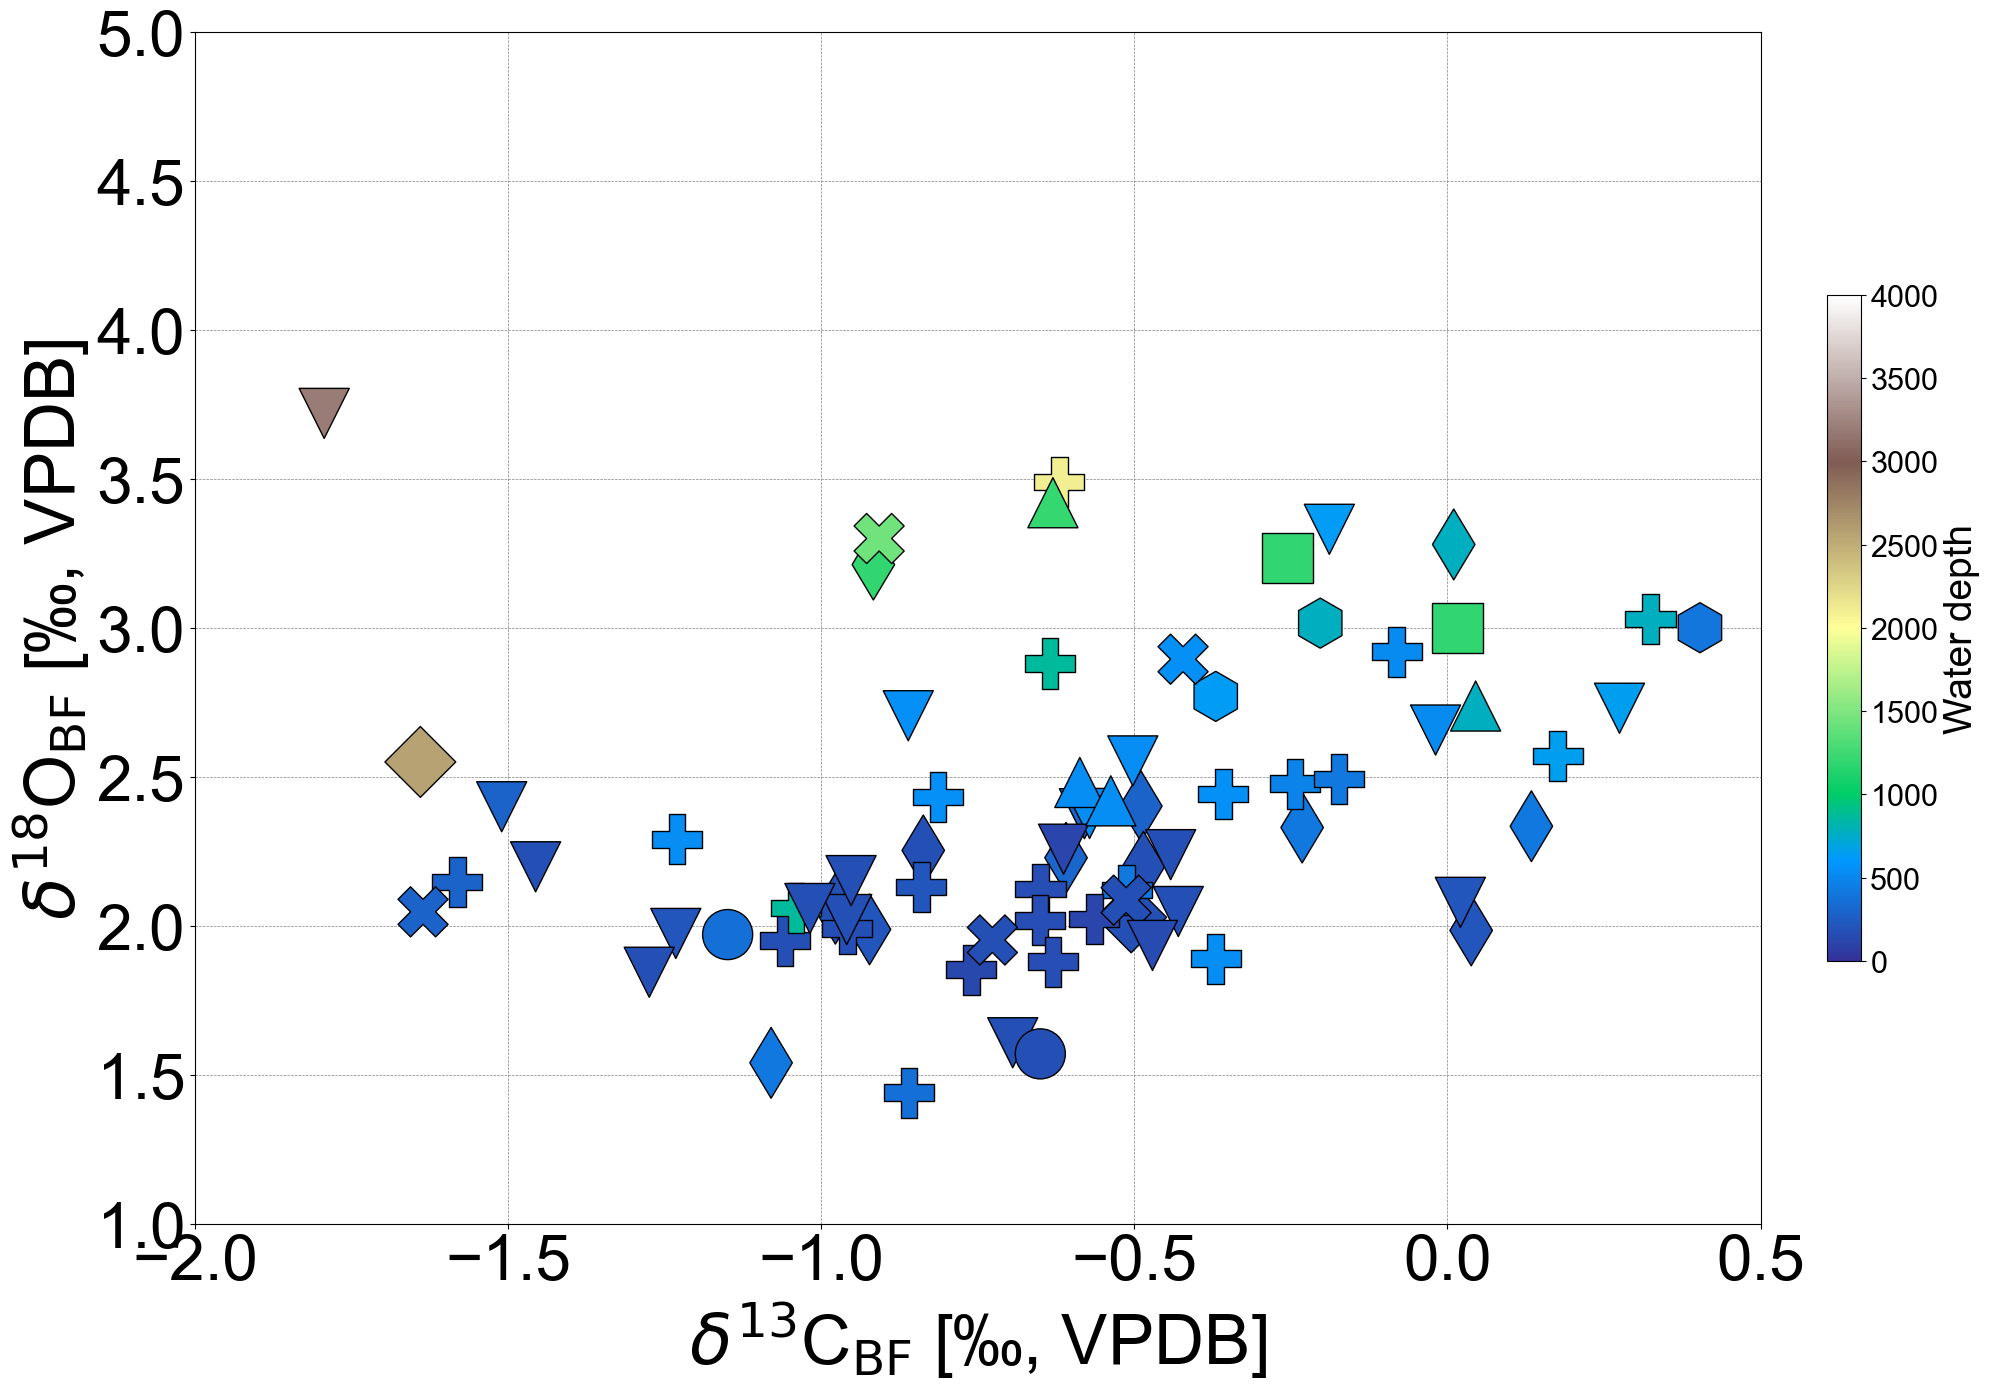

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Convert 'd13C VPDB corr' column to numeric, coercing any errors to NaN
df['d13C VPDB corr'] = pd.to_numeric(df['d13C VPDB corr'], errors='coerce')
df = df[df['Interglacial/glacial'] == 'Interglacial']

# Drop rows where 'd13C VPDB corr' has NaNs
df.dropna(subset=['d13C VPDB corr'], inplace=True)

# Calculate the difference and add it as a new column in the DataFrame
df['d18O_diff'] = df['d18O VPDB corr'] - df['d18Oec_mn_h2022']

# Filter the DataFrame to only include rows where species type is 'Epifaunal'
epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Epifaunal']

# Merge this filtered 'Epifaunal' DataFrame back into the original DataFrame
non_epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Epifaunal']
df = pd.concat([epifaunal, non_epifaunal])

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Check if the necessary columns exist in the DataFrame
if 'oxygen_h2023' in df.columns and 'd13C VPDB corr' in df.columns and 'Species' in df.columns and 'Water depth' in df.columns:
    # Filter the DataFrame for all Globobuliminids
    globobuliminids = [
        'Globobulimina spp.',
        'Globobulimina pacifica',
        'Globobulimina spp. pacifica',
        'Globobulimina auriculata',
        'Globobulimina spp. auriculata',
        'Globobulimina affinis',
        'Globobulimina spp. affinis',
        'Globobulimina turgida',
        'Praeglobobulimina spinescens'
    ]
    species_data = df[df['Species'].isin(globobuliminids)]

    # Create a dictionary to map species to different marker styles
    species_markers = {
        'Globobulimina spp.': 'h',           
        'Globobulimina pacifica': 'd',        
        'Globobulimina spp. pacifica': 'D',   
        'Globobulimina auriculata': 'P',      
        'Globobulimina spp. auriculata': 'X', 
        'Globobulimina affinis': 'v',         
        'Globobulimina spp. affinis': '^',    
        'Globobulimina turgida': 'o',         
        'Praeglobobulimina spinescens': 's',  
    }

    # Normalize the 'Water depth' column to get colors
    norm = plt.Normalize(0, 4000)
    cmap = plt.cm.terrain

    # Create a scatter plot comparing 'd13C VPDB corr' with 'd18O VPDB corr'
    fig, ax = plt.subplots(figsize=(20, 14))  # Making the figure a bit larger to accommodate the legend

    scatter_list = []

    # Plot each species with a specific marker and color based on 'Water depth'
    for species, marker in species_markers.items():
        species_plot_data = species_data[species_data['Species'] == species]
        sc = ax.scatter(
            species_plot_data['d13C VPDB corr'], 
            species_plot_data['d18O VPDB corr'], 
            c=species_plot_data['Water depth'], 
            cmap=cmap, 
            marker=marker, 
            s=1300, 
            zorder=15,
            label=species,
            edgecolor='black',  # Adding edgecolor to make shapes more distinguishable
            norm=norm  # Ensure the normalization is applied here
        )
        scatter_list.append(sc)

    # Add a title and labels to the axes
    ax.set_xlabel(r'$\delta^{13}$C$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=50)
    ax.set_ylabel(r'$\delta^{18}$O$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=50)
    ax.tick_params(axis='both', labelsize=46)

    # Set x-axis limits
    ax.set_xlim(-2, 0.5)
    ax.set_ylim(1, 5)
      
        
    # Place the legend outside the plot
    #ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.1, fontsize=25)

    # Create a colorbar
    cbar = fig.colorbar(scatter_list[0], ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Water depth', fontsize=28)
    cbar.ax.tick_params(labelsize=22)

    # Add grid
    ax.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')

    # Adjust the layout to make room for the legend
    plt.tight_layout()
   
    # Show the plot
    plt.show()

## $\delta^{13}$C$_{\mathrm{BF}}$ and $\delta^{18}$O$_{\mathrm{BF}}$ vs latitude, by water depth and species

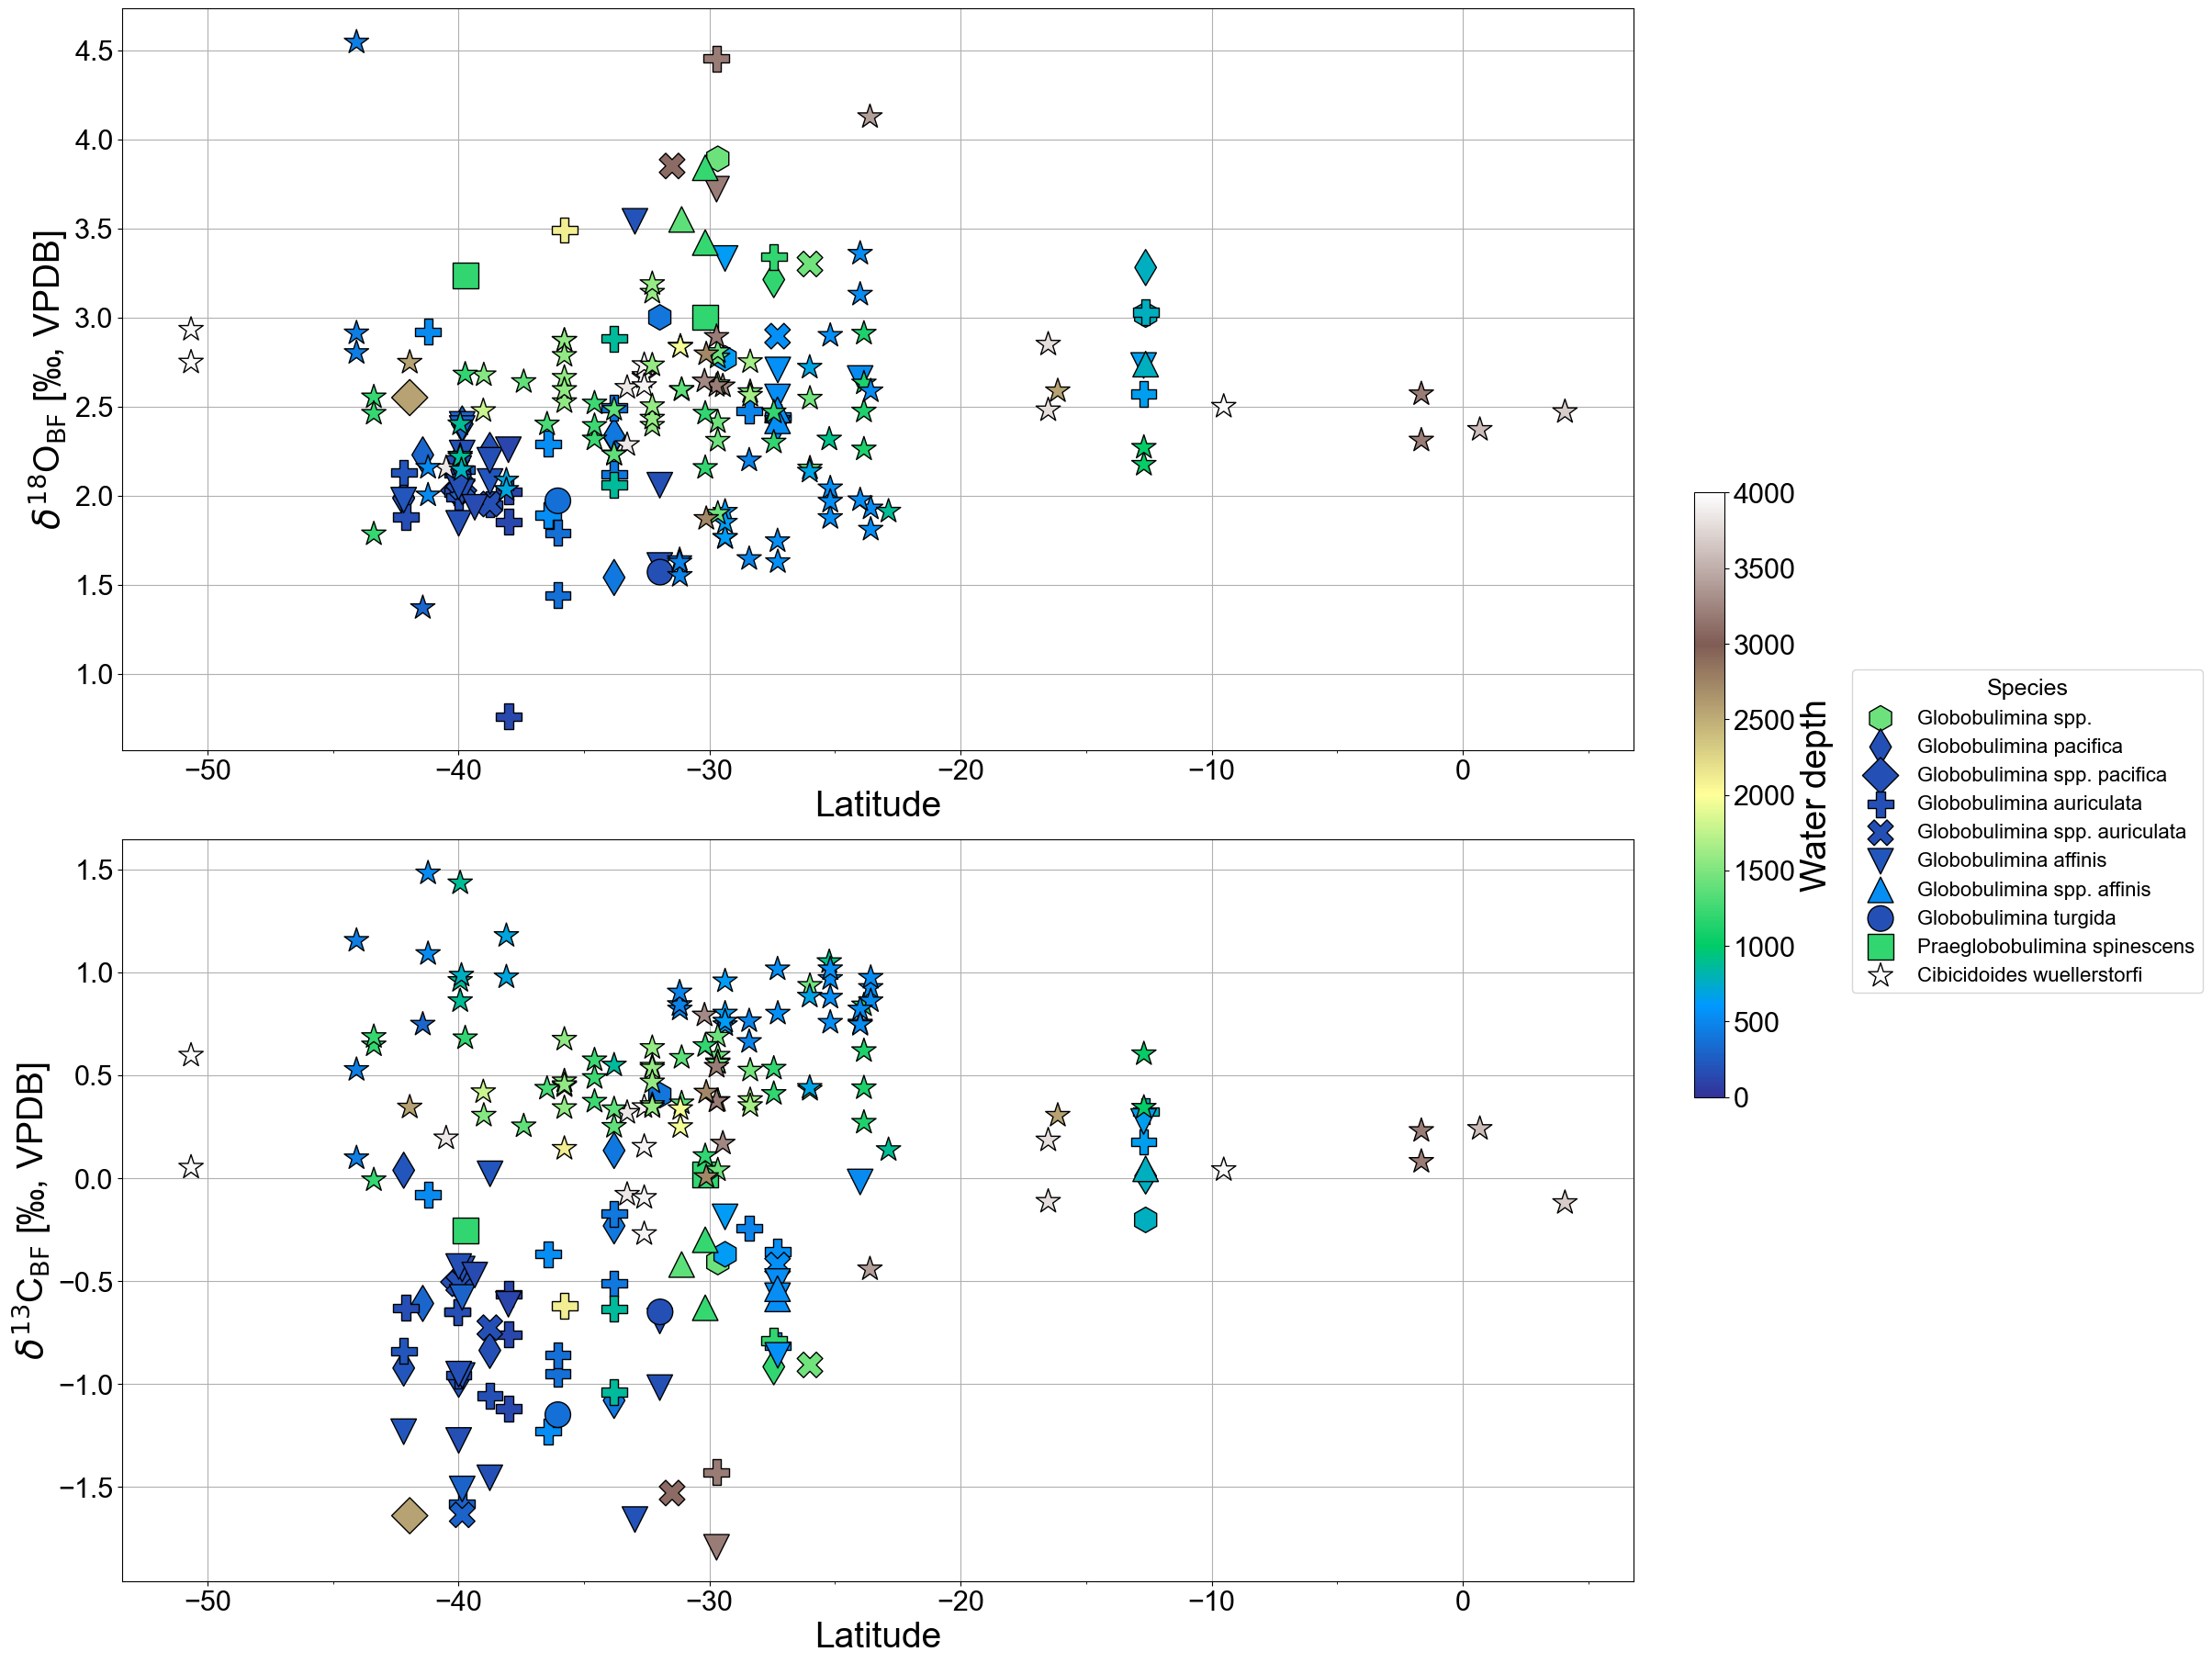

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Ensure that the 'Lat.' column is treated as numeric
df['Lat.'] = pd.to_numeric(df['Lat.'], errors='coerce')

# Create a dictionary to map species to different marker styles
species_markers = {
    'Globobulimina spp.': 'h',           # Hexagon
    'Globobulimina pacifica': 'd',       # Diamond
    'Globobulimina spp. pacifica': 'D',  # Filled Diamond
    'Globobulimina auriculata': 'P',     # Plus
    'Globobulimina spp. auriculata': 'X',# Cross
    'Globobulimina affinis': 'v',        # Triangle down
    'Globobulimina spp. affinis': '^',   # Triangle up
    'Globobulimina turgida': 'o',        # Circle
    'Praeglobobulimina spinescens': 's', # Square
    'Cibicidoides wuellerstorfi': '*',   # Star
}

# Normalize the 'Water depth' column to get colors
norm = plt.Normalize(0, 4000)
cmap = plt.cm.terrain

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Create a figure with two subplots arranged vertically
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 18), constrained_layout=True)

# Create the first scatter plot for d18O VPDB corr vs. Latitude
scatter_plots = []
for species, marker in species_markers.items():
    species_data = df[df['Species'] == species]
    sc1 = axes[0].scatter(
        species_data['Lat.'], 
        species_data['d18O VPDB corr'], 
        c=species_data['Water depth'], 
        cmap=cmap, 
        marker=marker, 
        s=400, 
        zorder=15,
        label=species,
        norm=norm,
        edgecolor='black'  # Adding edgecolor to make shapes more distinguishable
    )
    scatter_plots.append(sc1)
axes[0].set_xlabel('Latitude', fontsize=28)
axes[0].set_ylabel(r'$\delta^{18}$O$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=28)
axes[0].grid(True)

# Increase text size for tick labels
axes[0].tick_params(axis='both', labelsize=22)
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(10))
axes[0].xaxis.set_minor_locator(ticker.MultipleLocator(5))

# Create the second scatter plot for d13C VPDB corr vs. Latitude
for species, marker in species_markers.items():
    species_data = df[df['Species'] == species]
    sc2 = axes[1].scatter(
        species_data['Lat.'], 
        species_data['d13C VPDB corr'], 
        c=species_data['Water depth'], 
        cmap=cmap, 
        marker=marker, 
        s=400, 
        zorder=15,
        label=species,
        norm=norm,
        edgecolor='black'  # Adding edgecolor to make shapes more distinguishable
    )
    scatter_plots.append(sc2)
axes[1].set_xlabel('Latitude', fontsize=28)
axes[1].set_ylabel(r'$\delta^{13}$C$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=28)
axes[1].grid(True)

# Increase text size for tick labels
axes[1].tick_params(axis='both', labelsize=22)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(10))
axes[1].xaxis.set_minor_locator(ticker.MultipleLocator(5))

# Create legends explicitly
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Species', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, title_fontsize=18)

# Create a colorbar
cbar = fig.colorbar(scatter_plots[0], ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Water depth', fontsize=28)
cbar.ax.tick_params(labelsize=22)

# Show the plots
plt.show()

## $\delta^{13}$C$_{\mathrm{BF}}$ vs. $\delta^{13}$C$_{\mathrm{DIC}}$, by water depth and species

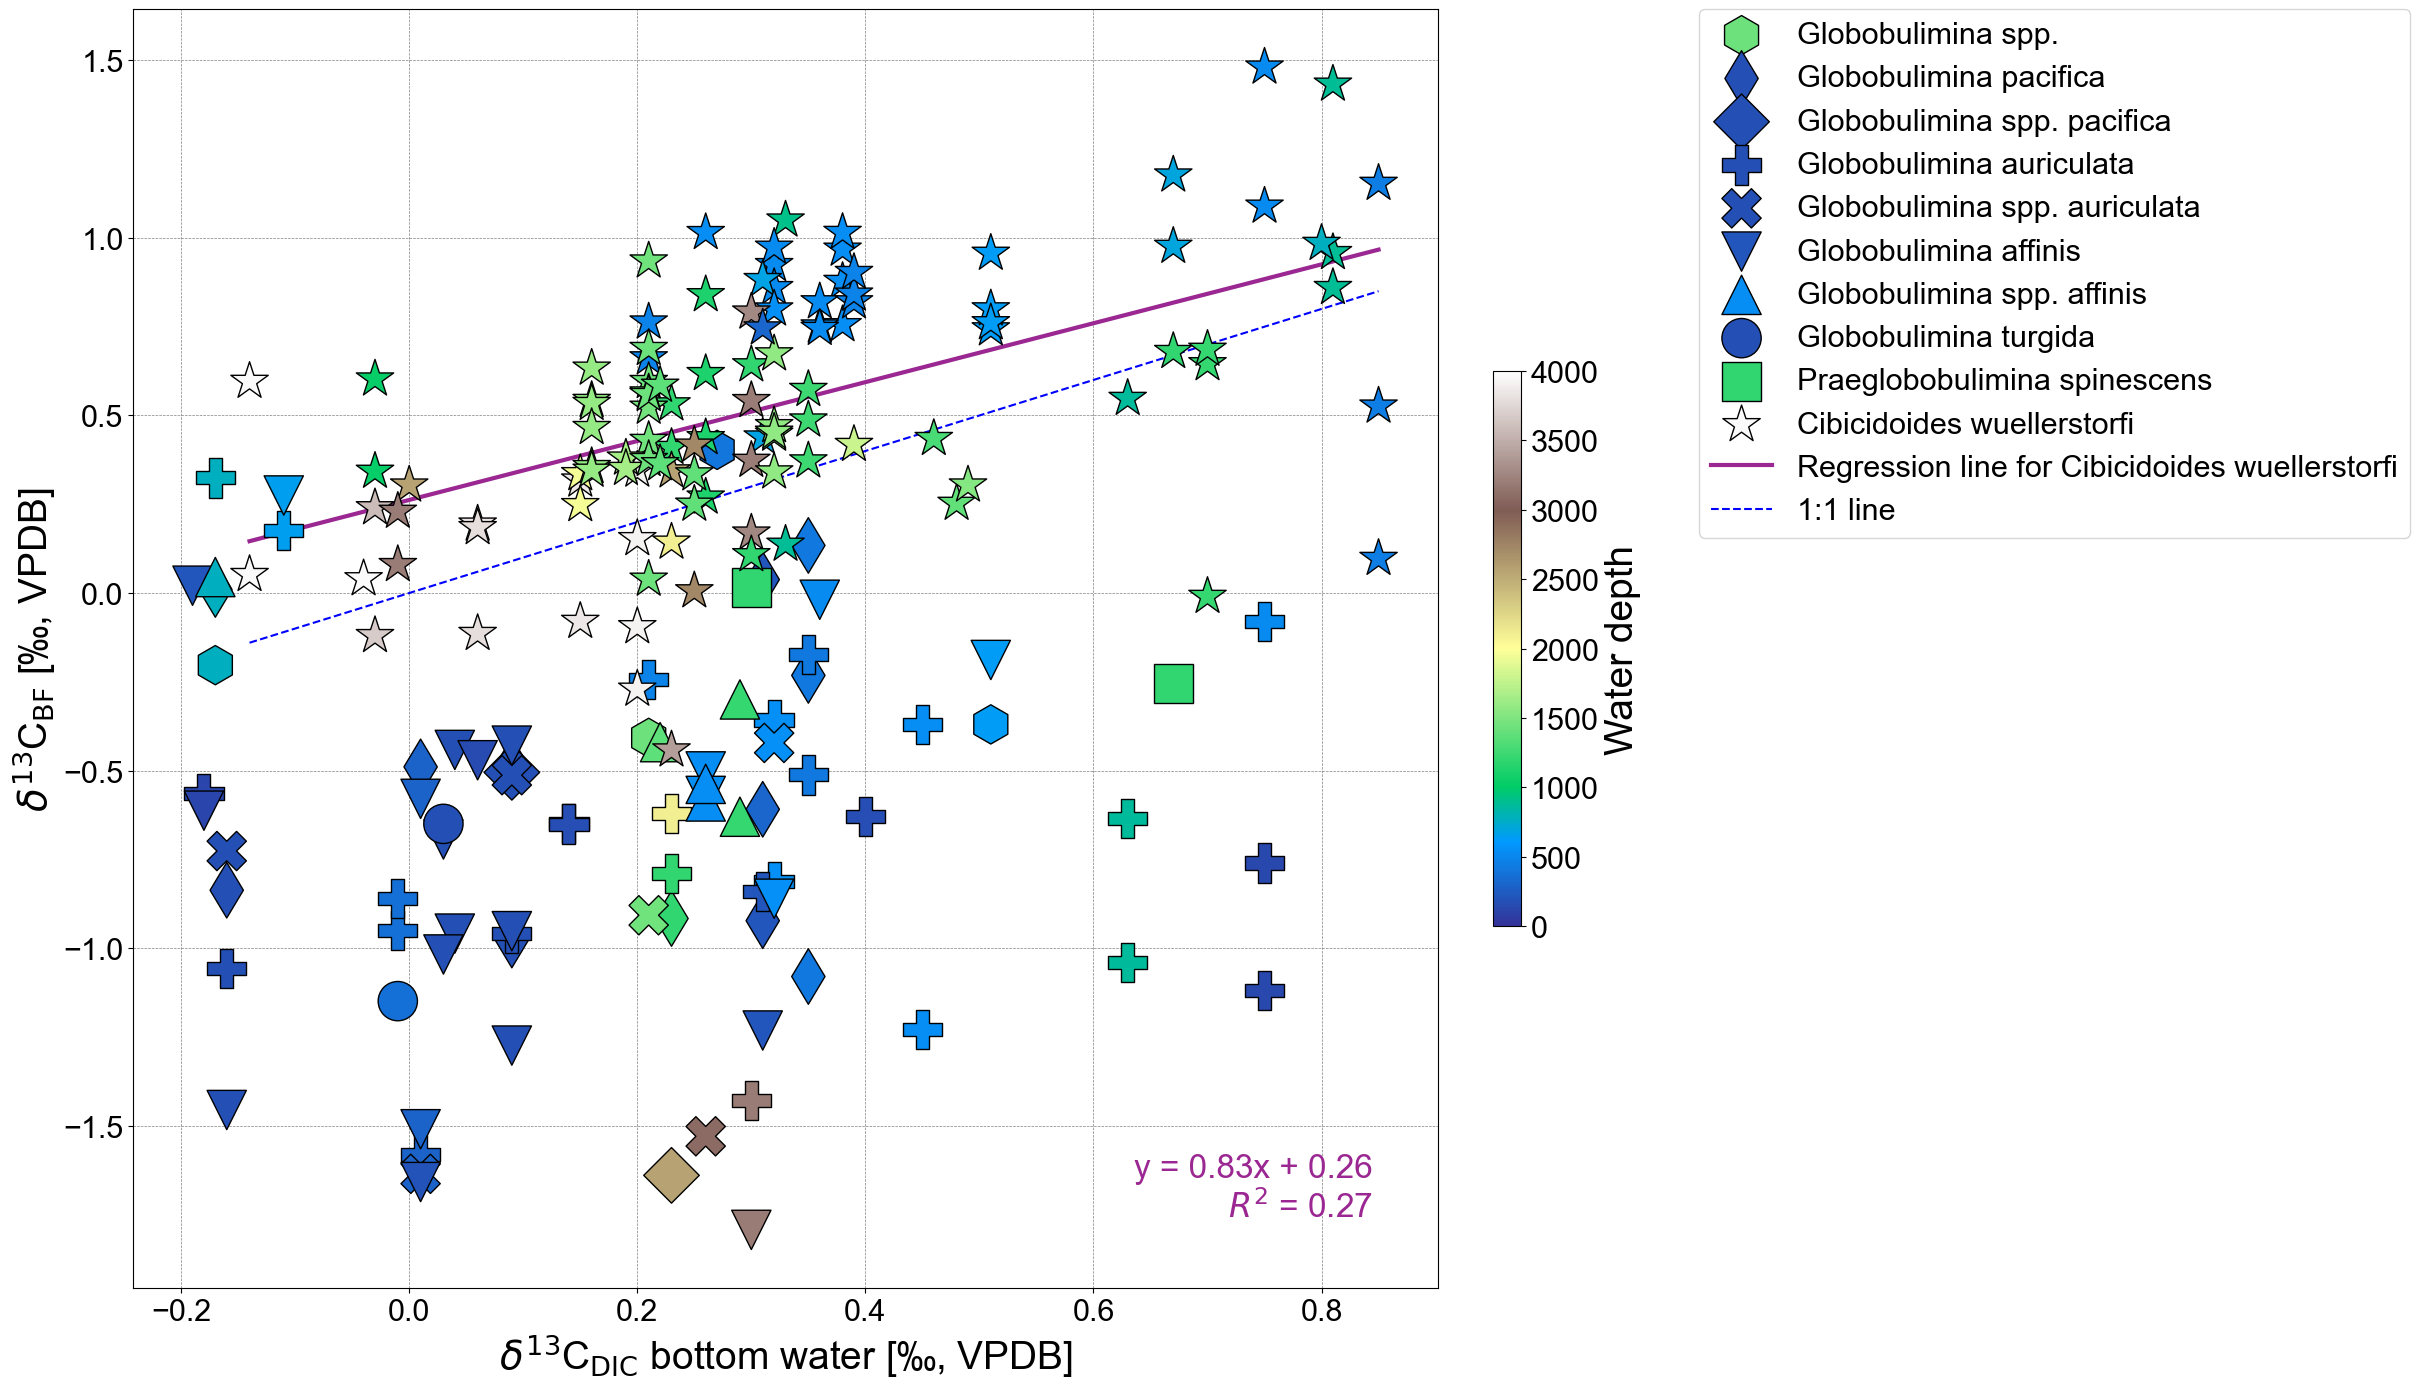

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Convert 'd13C VPDB corr' column to numeric, coercing any errors to NaN
df['d13C VPDB corr'] = pd.to_numeric(df['d13C VPDB corr'], errors='coerce')

# Drop rows where 'd13C VPDB corr' has NaNs
df.dropna(subset=['d13C VPDB corr'], inplace=True)

# Calculate the difference and add it as a new column in the DataFrame
df['d18O_diff'] = df['d18Oec_mn_h2022'] - df['d18O VPDB corr']

# Filter the DataFrame to only include rows where species type is 'Epifaunal'
epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Epifaunal']

# Merge this filtered 'Epifaunal' DataFrame back into the original DataFrame
non_epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Epifaunal']
df = pd.concat([epifaunal, non_epifaunal])

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Check if the necessary columns exist in the DataFrame
if 'oxygen_h2023' in df.columns and 'd13C VPDB corr' in df.columns and 'Species' in df.columns:

    # Create a dictionary to map species to different marker styles
    species_markers = {
        'Globobulimina spp.': 'h',           # Hexagon
        'Globobulimina pacifica': 'd',       # Diamond
        'Globobulimina spp. pacifica': 'D',  # Filled Diamond
        'Globobulimina auriculata': 'P',     # Plus
        'Globobulimina spp. auriculata': 'X',# Cross
        'Globobulimina affinis': 'v',        # Triangle down
        'Globobulimina spp. affinis': '^',   # Triangle up
        'Globobulimina turgida': 'o',        # Circle
        'Praeglobobulimina spinescens': 's', # Square
        'Cibicidoides wuellerstorfi': '*',   # Star
    }

    # Normalize the 'Water depth' column to get colors
    #norm = plt.Normalize(df['Water depth'].min(), df['Water depth'].max())
    norm = plt.Normalize(0, 4000)
    cmap = plt.cm.terrain

    # Create a scatter plot comparing 'd13c_dic_h2022' with 'd13C VPDB corr'
    fig, ax = plt.subplots(figsize=(25, 14))  # Making the figure a bit larger to accommodate the legend

    # Plot each species with a specific marker and color based on 'Water depth'
    for species, marker in species_markers.items():
        species_data = df[df['Species'] == species]
        sc = ax.scatter(
            species_data['d13c_dic_h2022'], 
            species_data['d13C VPDB corr'], 
            c=species_data['Water depth'], 
            cmap=cmap, 
            marker=marker, 
            s=800, 
            zorder=15,
            label=species,
            norm=norm,
            edgecolor='black'  # Adding edgecolor to make shapes more distinguishable
        )

    # Linear regression for 'Cibicidoides wuellerstorfi'
    cib_df = df[df['Species'] == 'Cibicidoides wuellerstorfi']
    slope, intercept, r_value, p_value, std_err = linregress(cib_df['d13c_dic_h2022'], cib_df['d13C VPDB corr'])
    line_x = np.linspace(cib_df['d13c_dic_h2022'].min(), cib_df['d13c_dic_h2022'].max(), 100)
    line_y = slope * line_x + intercept
    ax.plot(line_x, line_y, color='#9B2792', linewidth=3, label=f'Regression line for Cibicidoides wuellerstorfi')

    # 1:1 line
    one_to_one_x = np.linspace(cib_df['d13c_dic_h2022'].min(), cib_df['d13c_dic_h2022'].max(), 100)
    one_to_one_y = one_to_one_x  # y = x for a 1:1 line
    ax.plot(one_to_one_x, one_to_one_y, color='blue', linestyle='--', label='1:1 line')
    
    # Annotate the regression equation and R² value
    ax.text(0.95, 0.05, f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}', 
            ha='right', va='bottom', transform=ax.transAxes, color='#9B2792', fontsize=24)
    
    # Add a title and labels to the axes
    ax.set_xlabel(r'$\delta^{13}$C$_{\mathrm{DIC}}$ bottom water [‰, VPDB]', fontsize=28)
    ax.set_ylabel(r'$\delta^{13}$C$_{\mathrm{BF}}$ [‰, VPDB]', fontsize=28)
    ax.tick_params(axis='both', labelsize=22)

    # Place the legend outside the plot
    ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0., fontsize=22)
    
    # Create a colorbar
    cbar = fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Water depth', fontsize=28)
    cbar.ax.tick_params(labelsize=22)
    
    # Add grid
    ax.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')
    
    # Adjust the layout to make room for the legend
    plt.tight_layout()

    # Show the plot
    plt.show()

## Carbon gradient proxy

You need to define the Water depth range you want to use for C. wuellerstorfi and Globobulimina species, which should be 500 m (initially). You can change it to the water depth you want. 

- Filter out C. wuellerstorfi:
df = df[(df['Species'] != 'Cibicidoides wuellerstorfi') | (df['Water depth'] > 500)]

- Filter out Globobulimina species:
df = df[(df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Deep infaunal') | (df['Water depth'] > 500)]

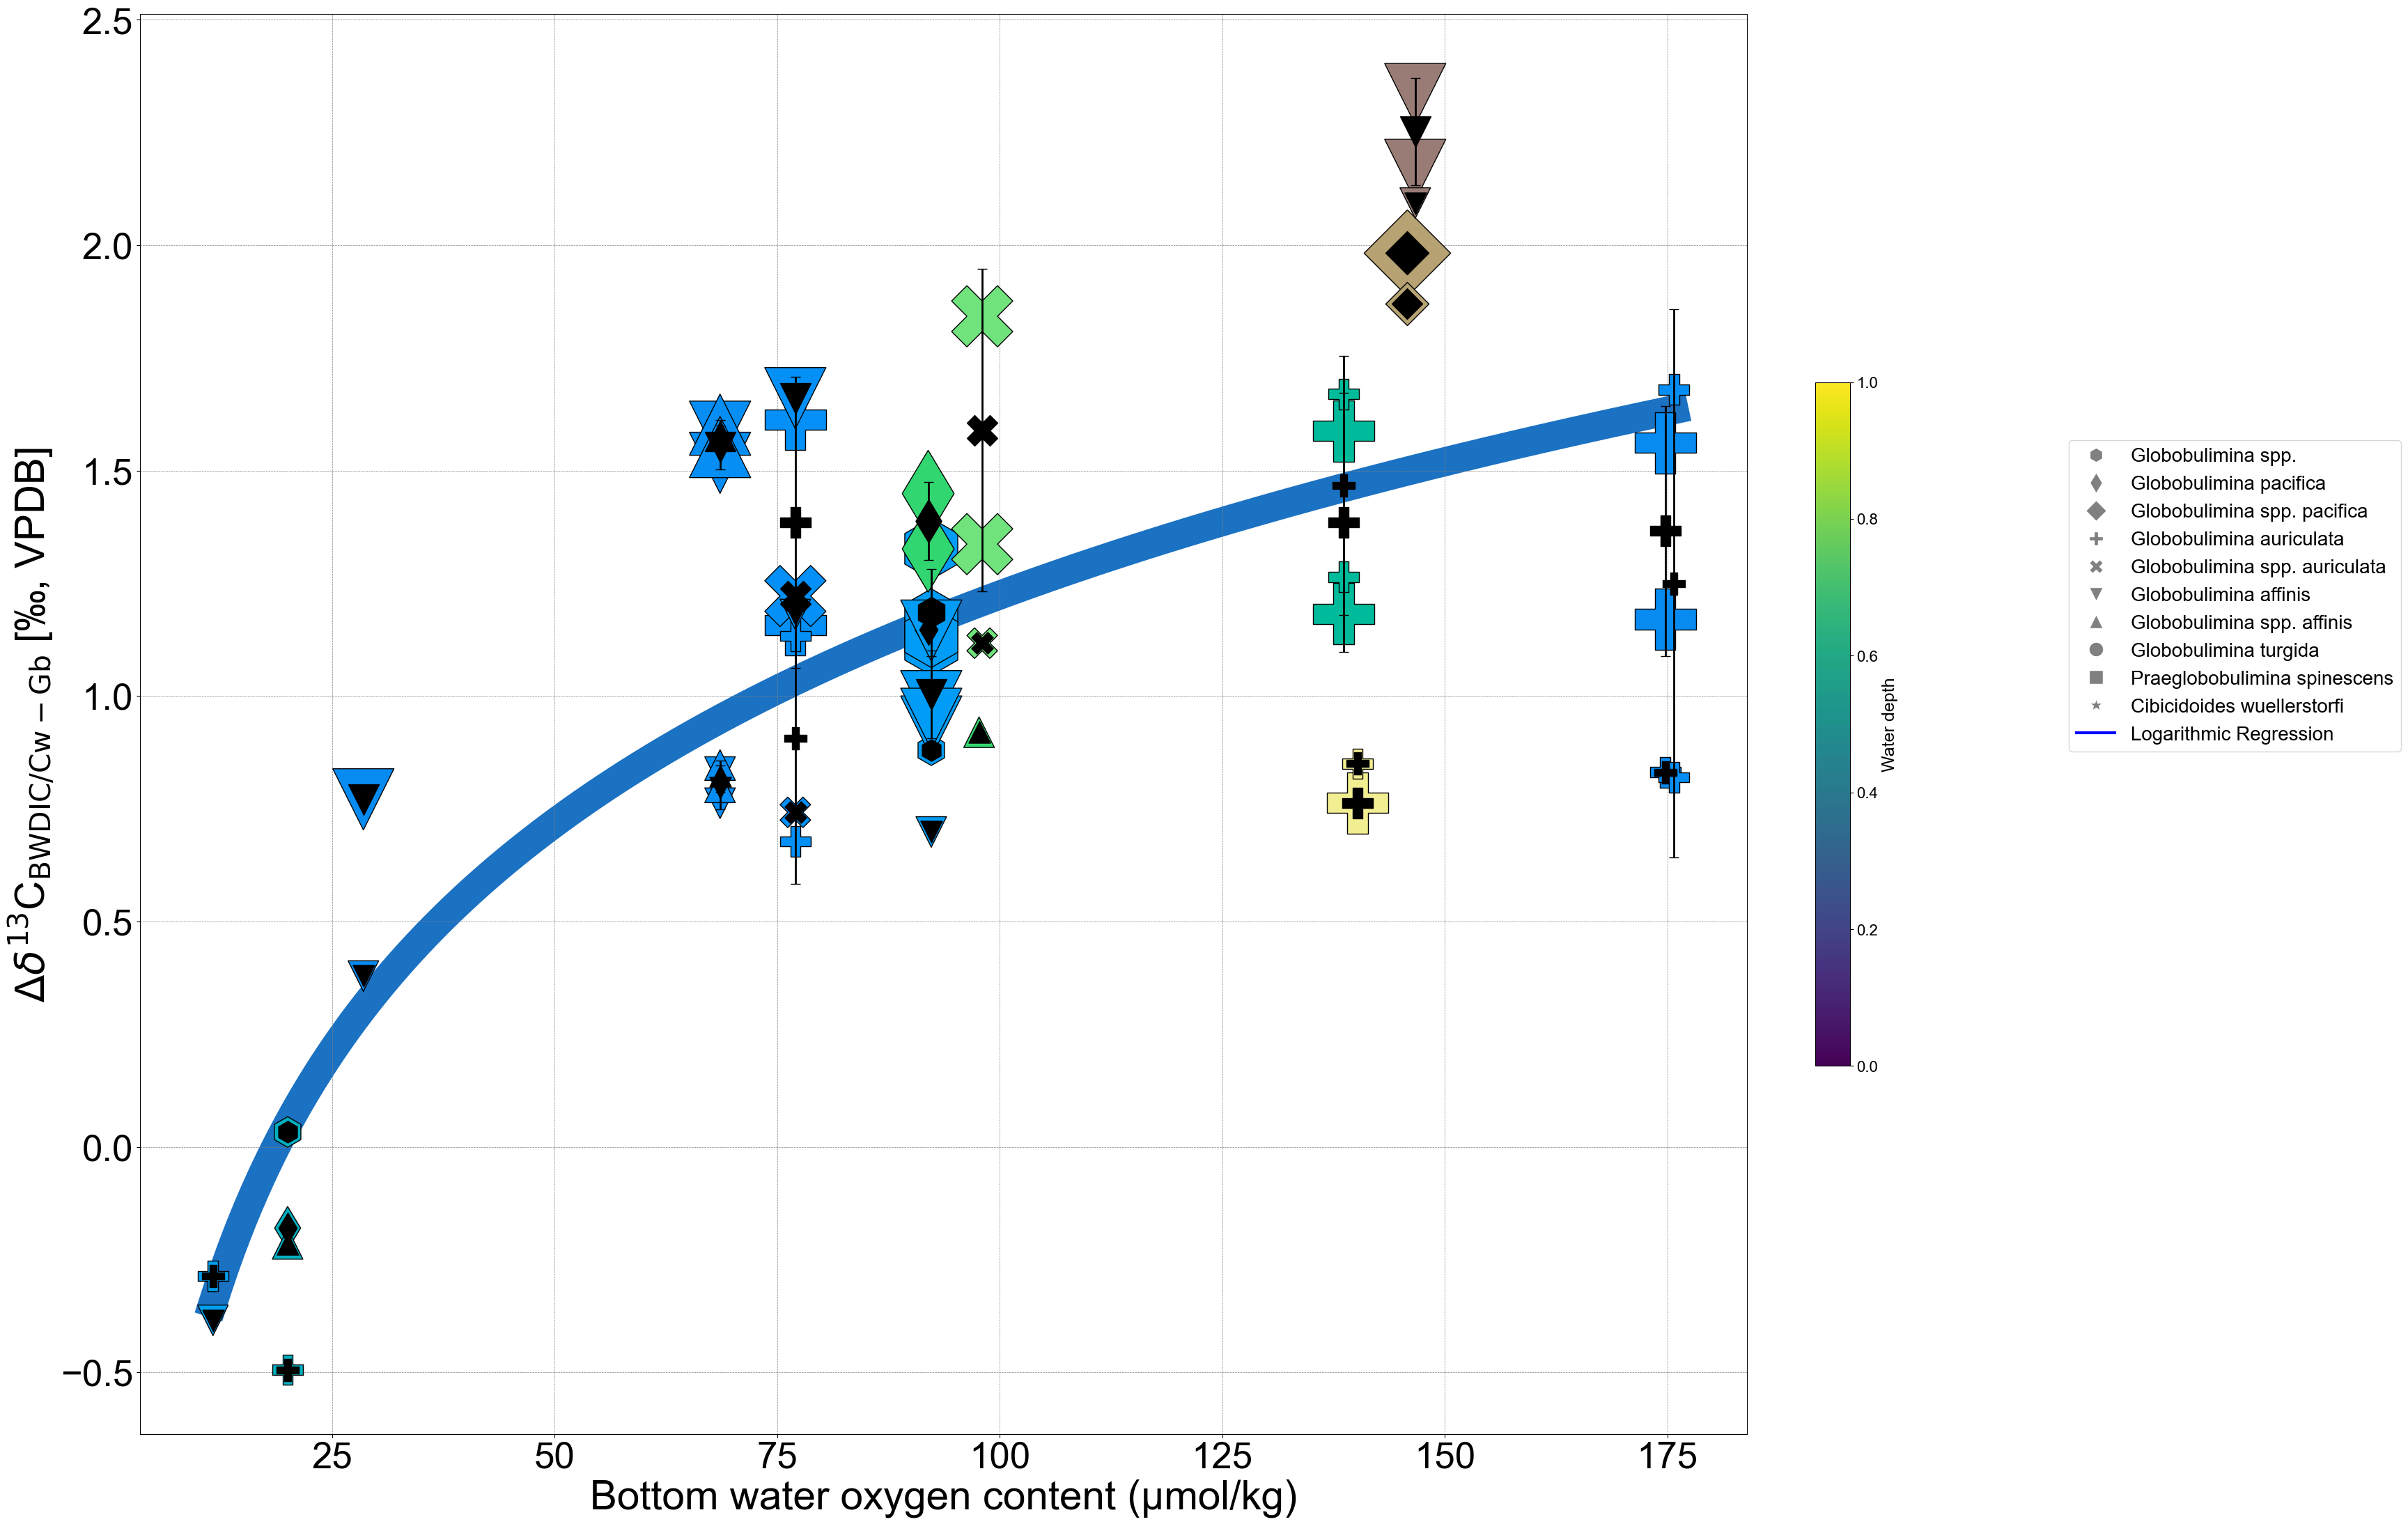


Logarithmic Regression Report:
                            OLS Regression Results                            
Dep. Variable:         d13C_diff_mean   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     72.30
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           3.92e-10
Time:                        12:02:25   Log-Likelihood:                -18.075
No. Observations:                  38   AIC:                             40.15
Df Residuals:                      36   BIC:                             43.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import statsmodels.api as sm

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Filter the DataFrame to only include rows where 'Interglacial/glacial' is 'Interglacial'
df = df[df['Interglacial/glacial'] == 'Interglacial']
df = df[df['Species'] != 'Praeglobobulimina spinescens']

# Filter out C. wuellerstorfi
df = df[(df['Species'] != 'Cibicidoides wuellerstorfi') | (df['Water depth'] > 500)]

# Filter out Globobulimina species
df = df[(df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Deep infaunal') | (df['Water depth'] > 500)]

# Filter the DataFrame for specific species
species_list = [
    'Globobulimina spp.', 'Globobulimina pacifica', 'Globobulimina auriculata',
    'Globobulimina turgida', 'Globobulimina affinis', 'Globobulimina spp. affinis',
    'Globobulimina spp. auriculata', 'Globobulimina spp. pacifica',
    'Praeglobobulimina spinescens', 'Cibicidoides wuellerstorfi'
]
df = df[df['Species'].isin(species_list)]

# Calculate differences for epifaunal and infaunal species
epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Epifaunal']
infaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Deep infaunal']
differences = []

for _, epi_row in epifaunal.iterrows():
    sample_infaunal = infaunal[infaunal['Sample'] == epi_row['Sample']]
    for _, inf_row in sample_infaunal.iterrows():
        d13C_diff = epi_row['d13C VPDB corr'] - inf_row['d13C VPDB corr']
        differences.append({
            'Sample': epi_row['Sample'],
            'd13C_diff': d13C_diff,
            'Species': inf_row['Species'],
            'Water depth': inf_row['Water depth'],
            'oxygen_h2023': epi_row['oxygen_h2023'],
            'Type': 'Cw-Gb'  # C. wuellerstorfi minus deep infaunal
        })

# Calculate differences for bottom water DIC and infaunal species
infaunal_df = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Deep infaunal'].copy()
infaunal_df['d13C_diff'] = infaunal_df['d13c_dic_h2022'] - infaunal_df['d13C VPDB corr']
infaunal_df['Type'] = 'DIC-Gb'  # Bottom water DIC minus deep infaunal

# Merge both DataFrames
merged_df = pd.concat([pd.DataFrame(differences), infaunal_df], ignore_index=True)

# Plotting setup
species_markers = {
    'Globobulimina spp.': 'h', 'Globobulimina pacifica': 'd', 'Globobulimina spp. pacifica': 'D',
    'Globobulimina auriculata': 'P', 'Globobulimina spp. auriculata': 'X', 'Globobulimina affinis': 'v',
    'Globobulimina spp. affinis': '^', 'Globobulimina turgida': 'o', 'Praeglobobulimina spinescens': 's',
    'Cibicidoides wuellerstorfi': '*'
}

norm = plt.Normalize(0, 4000)
cmap = plt.cm.terrain

plt.figure(figsize=(35, 22))

# Plot original points
for species, marker in species_markers.items():
    species_data = merged_df[merged_df['Species'] == species]
    for measure_type in ['Cw-Gb', 'DIC-Gb']:
        type_data = species_data[species_data['Type'] == measure_type]
        size = 4000 if measure_type == 'Cw-Gb' else 1000
        plt.scatter(type_data['oxygen_h2023'], type_data['d13C_diff'], c=type_data['Water depth'], cmap=cmap,
                    marker=marker, s=size, zorder=15, edgecolor='black', norm=norm)

# Plot average points in black with standard deviation error bars
for species, marker in species_markers.items():
    species_data = avg_df[avg_df['Species'] == species]
    for measure_type in ['Cw-Gb', 'DIC-Gb']:
        type_data = species_data[species_data['Type'] == measure_type]
        size = 1000 if measure_type == 'Cw-Gb' else 500
        plt.scatter(type_data['oxygen_h2023'], type_data['d13C_diff_mean'], c='black',
                    marker=marker, s=size, zorder=20, edgecolor='black')
        plt.errorbar(type_data['oxygen_h2023'], type_data['d13C_diff_mean'], yerr=type_data['d13C_diff_std'],
                     fmt='none', ecolor='black', elinewidth=2, capsize=5, zorder=25)

# Perform logarithmic regression on the average data
X_log = np.log(avg_df['oxygen_h2023'])
Y = avg_df['d13C_diff_mean']
X_log = sm.add_constant(X_log)  # adding a constant for intercept

model_log = sm.OLS(Y, X_log).fit()
log_pred = model_log.predict(X_log)

# Plot the logarithmic regression line
X_fine = np.linspace(avg_df['oxygen_h2023'].min(), avg_df['oxygen_h2023'].max(), 500)
X_fine_log = sm.add_constant(np.log(X_fine))
Y_fine_log = model_log.predict(X_fine_log)

plt.plot(X_fine, Y_fine_log, label='Logarithmic Regression', color='#1b71c2', linewidth=30, zorder=-5)

# Labeling the axes
plt.xlabel('Bottom water oxygen content (μmol/kg)', fontsize=42)
plt.ylabel(r'Δ$\delta^{13}$C$_{\mathrm{BW DIC/Cw-Gb}}$ [‰, VPDB]', fontsize=42)
plt.tick_params(axis='both', labelsize=38)

# Creating custom legend handles for shapes
custom_lines = [Line2D([0], [0], marker=m, color='w', markerfacecolor='gray', markersize=15, label=s)
                for s, m in species_markers.items()]

plt.legend(handles=custom_lines + [Line2D([0], [0], color='blue', lw=3, label='Logarithmic Regression')],
           bbox_to_anchor=(1.2, 0.7), loc=2, borderaxespad=0., fontsize=20)

# Adding colorbar
cbar = plt.colorbar(orientation='vertical', fraction=0.02, pad=0.04, norm=norm)
cbar.set_label('Water depth', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# Adding grid and layout adjustment
plt.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')
plt.tight_layout()

plt.show()

# Logarithmic Regression Report
print("\nLogarithmic Regression Report:")
print(model_log.summary())


In [25]:
"""

This code will create a table with the carbon gradient calculations after the previous cell (filtered by depth)

"""

# Calculate the average and standard deviation by species by sample
avg_df = merged_df.groupby(['Species', 'Sample', 'Type']).agg({
    'd13C_diff': ['mean', 'std', 'count'],  # Add count to calculate the number of data points
    'oxygen_h2023': 'mean',
    'Water depth': 'mean'
}).reset_index()

# Flatten the column names
avg_df.columns = ['Species', 'Sample', 'Type', 'd13C_diff_mean', 'd13C_diff_std', 'Count', 'oxygen_h2023', 'Water depth']

avg_df.to_csv('Datasets/Created datasets/species_sample_averages-v1.txt', sep='\t', index=False)

# Display the averages in a table
print("Species Sample Averages:")
print(avg_df)

Species Sample Averages:
                          Species        Sample    Type  d13C_diff_mean  \
0           Globobulimina affinis   GeoB15022-2  DIC-Gb        0.796935   
1           Globobulimina affinis    GeoB7115-1  DIC-Gb        0.379000   
2           Globobulimina affinis    GeoB7123-1  DIC-Gb        1.181000   
3           Globobulimina affinis    GeoB7133-1  DIC-Gb        0.698614   
4           Globobulimina affinis    GeoB7136-1   Cw-Gb        2.251248   
5           Globobulimina affinis    GeoB7136-1  DIC-Gb        2.093568   
6           Globobulimina affinis  M92-236MUC42  DIC-Gb       -0.384658   
7        Globobulimina auriculata    GeoB7123-1  DIC-Gb        0.905715   
8        Globobulimina auriculata    GeoB7153-1  DIC-Gb        1.467232   
9        Globobulimina auriculata    GeoB7157-1   Cw-Gb        0.763133   
10       Globobulimina auriculata    GeoB7157-1  DIC-Gb        0.850000   
11       Globobulimina auriculata    GeoB7163-5  DIC-Gb        1.250000   


## Carbon gradient by Globobulimina species

You need to define the Water depth range you want to use for C. wuellerstorfi and Globobulimina species, which should be 500 m (initially). You can change it to the water depth you want. 

- Filter out C. wuellerstorfi: 
df = df[(df['Species'] != 'Cibicidoides wuellerstorfi') | (df['Water depth'] > 500)]

- Filter out Globobulimina species:
df = df[(df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Deep infaunal') | (df['Water depth'] > 500)]

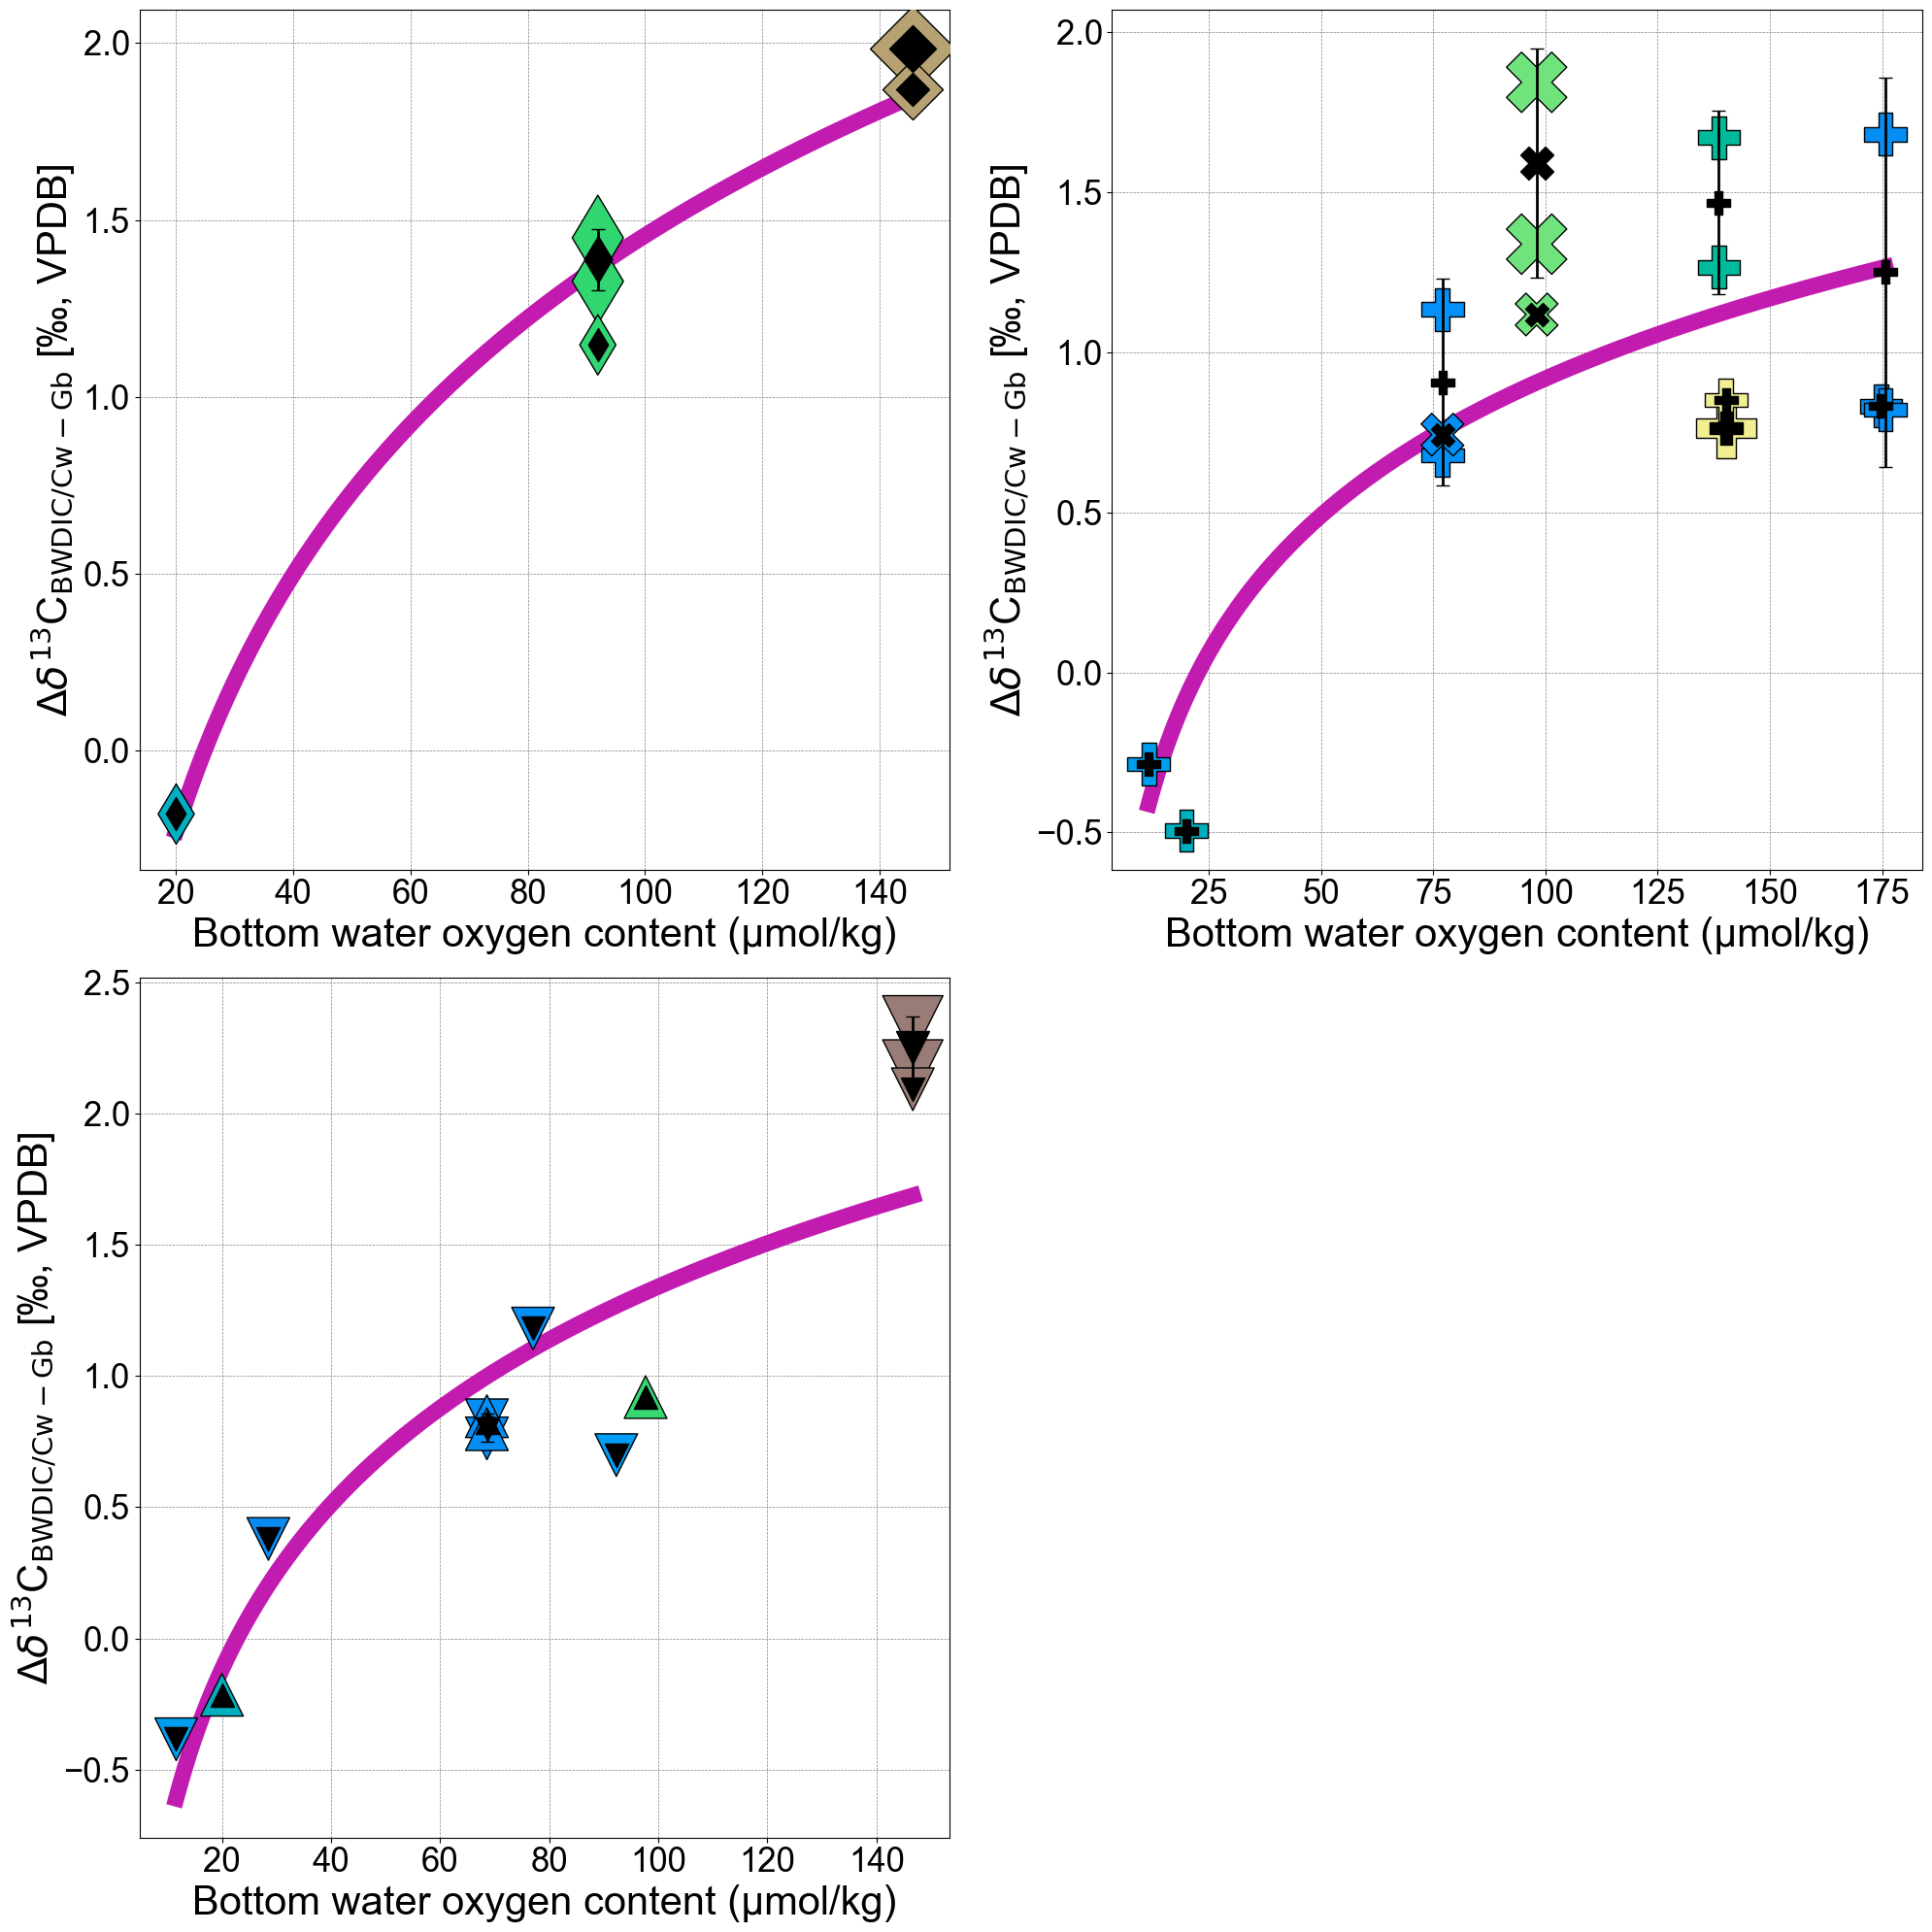


Logarithmic Regression Report for Globobulimina pacifica + Globobulimina spp. pacifica:
                            OLS Regression Results                            
Dep. Variable:         d13C_diff_mean   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     125.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):            0.00153
Time:                        12:04:39   Log-Likelihood:                 3.5717
No. Observations:                   5   AIC:                            -3.143
Df Residuals:                       3   BIC:                            -3.925
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import statsmodels.api as sm

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Filter the DataFrame to only include rows where 'Interglacial/glacial' is 'Interglacial'
df = df[df['Interglacial/glacial'] == 'Interglacial']
df = df[df['Species'] != 'Praeglobobulimina spinescens']

# Filter out C. wuellerstorfi
df = df[(df['Species'] != 'Cibicidoides wuellerstorfi') | (df['Water depth'] > 500)]

# Filter out Globobulimina species
df = df[(df['Species type (epifaunal, infaunal, deep infaunal)'] != 'Deep infaunal') | (df['Water depth'] > 500)]

# Filter the DataFrame for specific species
species_list = [
    'Globobulimina spp.', 'Globobulimina pacifica', 'Globobulimina auriculata',
    'Globobulimina turgida', 'Globobulimina affinis', 'Globobulimina spp. affinis',
    'Globobulimina spp. auriculata', 'Globobulimina spp. pacifica',
    'Praeglobobulimina spinescens', 'Cibicidoides wuellerstorfi'
]
df = df[df['Species'].isin(species_list)]

# Calculate differences for epifaunal and infaunal species
epifaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Epifaunal']
infaunal = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Deep infaunal']
differences = []

for _, epi_row in epifaunal.iterrows():
    sample_infaunal = infaunal[infaunal['Sample'] == epi_row['Sample']]
    for _, inf_row in sample_infaunal.iterrows():
        d13C_diff = epi_row['d13C VPDB corr'] - inf_row['d13C VPDB corr']
        differences.append({
            'Sample': epi_row['Sample'],
            'd13C_diff': d13C_diff,
            'Species': inf_row['Species'],
            'Water depth': inf_row['Water depth'],
            'oxygen_h2023': epi_row['oxygen_h2023'],
            'Type': 'Cw-Gb'  # C. wuellerstorfi minus deep infaunal
        })

# Calculate differences for bottom water DIC and infaunal species
infaunal_df = df[df['Species type (epifaunal, infaunal, deep infaunal)'] == 'Deep infaunal'].copy()
infaunal_df['d13C_diff'] = infaunal_df['d13c_dic_h2022'] - infaunal_df['d13C VPDB corr']
infaunal_df['Type'] = 'DIC-Gb'  # Bottom water DIC minus deep infaunal

# Merge both DataFrames
merged_df = pd.concat([pd.DataFrame(differences), infaunal_df], ignore_index=True)

# Calculate the average and standard deviation by species by sample
avg_df = merged_df.groupby(['Species', 'Sample', 'Type']).agg({
    'd13C_diff': ['mean', 'std', 'count'],  # Add count to calculate the number of data points
    'oxygen_h2023': 'mean',
    'Water depth': 'mean'
}).reset_index()

# Flatten the column names
avg_df.columns = ['Species', 'Sample', 'Type', 'd13C_diff_mean', 'd13C_diff_std', 'Count', 'oxygen_h2023', 'Water depth']

# Plotting setup
species_markers = {
    'Globobulimina spp.': 'h', 'Globobulimina pacifica': 'd', 'Globobulimina spp. pacifica': 'D',
    'Globobulimina auriculata': 'P', 'Globobulimina spp. auriculata': 'X', 'Globobulimina affinis': 'v',
    'Globobulimina spp. affinis': '^', 'Globobulimina turgida': 'o', 'Praeglobobulimina spinescens': 's',
    'Cibicidoides wuellerstorfi': '*'
}

norm = plt.Normalize(0, 4000)
cmap = plt.cm.terrain

fig, axs = plt.subplots(2, 2, figsize=(20, 20))  # Adjust to 2x2 grid of subplots

species_groups = [
    ('Globobulimina pacifica', 'Globobulimina spp. pacifica'),
    ('Globobulimina auriculata', 'Globobulimina spp. auriculata'),
    ('Globobulimina affinis', 'Globobulimina spp. affinis')
]

# Plotting each group
for i, (species, spp_species) in enumerate(species_groups):
    ax = axs[i // 2, i % 2]  # Use integer division and modulus for positioning

    for sp in [species, spp_species]:
        species_data = merged_df[merged_df['Species'] == sp]
        for measure_type in ['Cw-Gb', 'DIC-Gb']:
            type_data = species_data[species_data['Type'] == measure_type]
            size = 2000 if measure_type == 'Cw-Gb' else 1000
            ax.scatter(type_data['oxygen_h2023'], type_data['d13C_diff'], c=type_data['Water depth'], cmap=cmap,
                       marker=species_markers[sp], s=size, zorder=15, edgecolor='black', norm=norm)

    # Plot average points in black with standard deviation error bars
    for sp in [species, spp_species]:
        species_data = avg_df[avg_df['Species'] == sp]
        for measure_type in ['Cw-Gb', 'DIC-Gb']:
            type_data = species_data[species_data['Type'] == measure_type]
            size = 600 if measure_type == 'Cw-Gb' else 300
            ax.scatter(type_data['oxygen_h2023'], type_data['d13C_diff_mean'], c='black',
                       marker=species_markers[sp], s=size, zorder=20, edgecolor='black')
            ax.errorbar(type_data['oxygen_h2023'], type_data['d13C_diff_mean'], yerr=type_data['d13C_diff_std'],
                        fmt='none', ecolor='black', elinewidth=2, capsize=5, zorder=25)

    # Perform logarithmic regression on the average data
    species_data_avg = avg_df[(avg_df['Species'] == species) | (avg_df['Species'] == spp_species)]
    X_log = np.log(species_data_avg['oxygen_h2023'])
    Y = species_data_avg['d13C_diff_mean']
    X_log = sm.add_constant(X_log)  # adding a constant for intercept

    model_log = sm.OLS(Y, X_log).fit()
    log_pred = model_log.predict(X_log)

    # Plot the logarithmic regression line
    X_fine = np.linspace(species_data_avg['oxygen_h2023'].min(), species_data_avg['oxygen_h2023'].max(), 500)
    X_fine_log = sm.add_constant(np.log(X_fine))
    Y_fine_log = model_log.predict(X_fine_log)

    ax.plot(X_fine, Y_fine_log, label=f'Logarithmic Regression ({species} + {spp_species})', color='#c21bb0', linewidth=12)

    # Labeling the axes
    ax.set_xlabel('Bottom water oxygen content (μmol/kg)', fontsize=30)
    ax.set_ylabel(r'Δ$\delta^{13}$C$_{\mathrm{BW DIC/Cw-Gb}}$ [‰, VPDB]', fontsize=30)
    ax.tick_params(axis='both', labelsize=25)

    
    # Creating custom legend handles for shapes
    custom_lines = [Line2D([0], [0], marker=species_markers[sp], color='w', markerfacecolor='gray', markersize=15, label=sp)
                    for sp in [species, spp_species]]

    #ax.legend(handles=custom_lines + [Line2D([0], [0], color='blue', lw=3, label='Logarithmic Regression')],
              #bbox_to_anchor=(1.2, 0.7), loc=2, borderaxespad=0., fontsize=20)

    # Adding colorbar
    #cbar = fig.colorbar(ax.scatter([], [], c=[], cmap=cmap, norm=norm), ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    #cbar.set_label('Water depth', fontsize=18)
    #cbar.ax.tick_params(labelsize=16)

    # Adding grid and layout adjustment
    ax.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')

if len(species_groups) % 2 != 0:
    axs[-1, -1].axis('off')  # Turn off the last subplot

plt.tight_layout()

plt.show()



"""

This part of the code will create a separate report for each species. 

"""


# Logarithmic Regression Reports
for species, spp_species in species_groups:
    species_data_avg = avg_df[(avg_df['Species'] == species) | (avg_df['Species'] == spp_species)]
    X_log = np.log(species_data_avg['oxygen_h2023'])
    Y = species_data_avg['d13C_diff_mean']
    X_log = sm.add_constant(X_log)  # adding a constant for intercept

    model_log = sm.OLS(Y, X_log).fit()
    
    print(f"\nLogarithmic Regression Report for {species} + {spp_species}:")
    print(model_log.summary())


## Specimen size and carbon isotope offsets

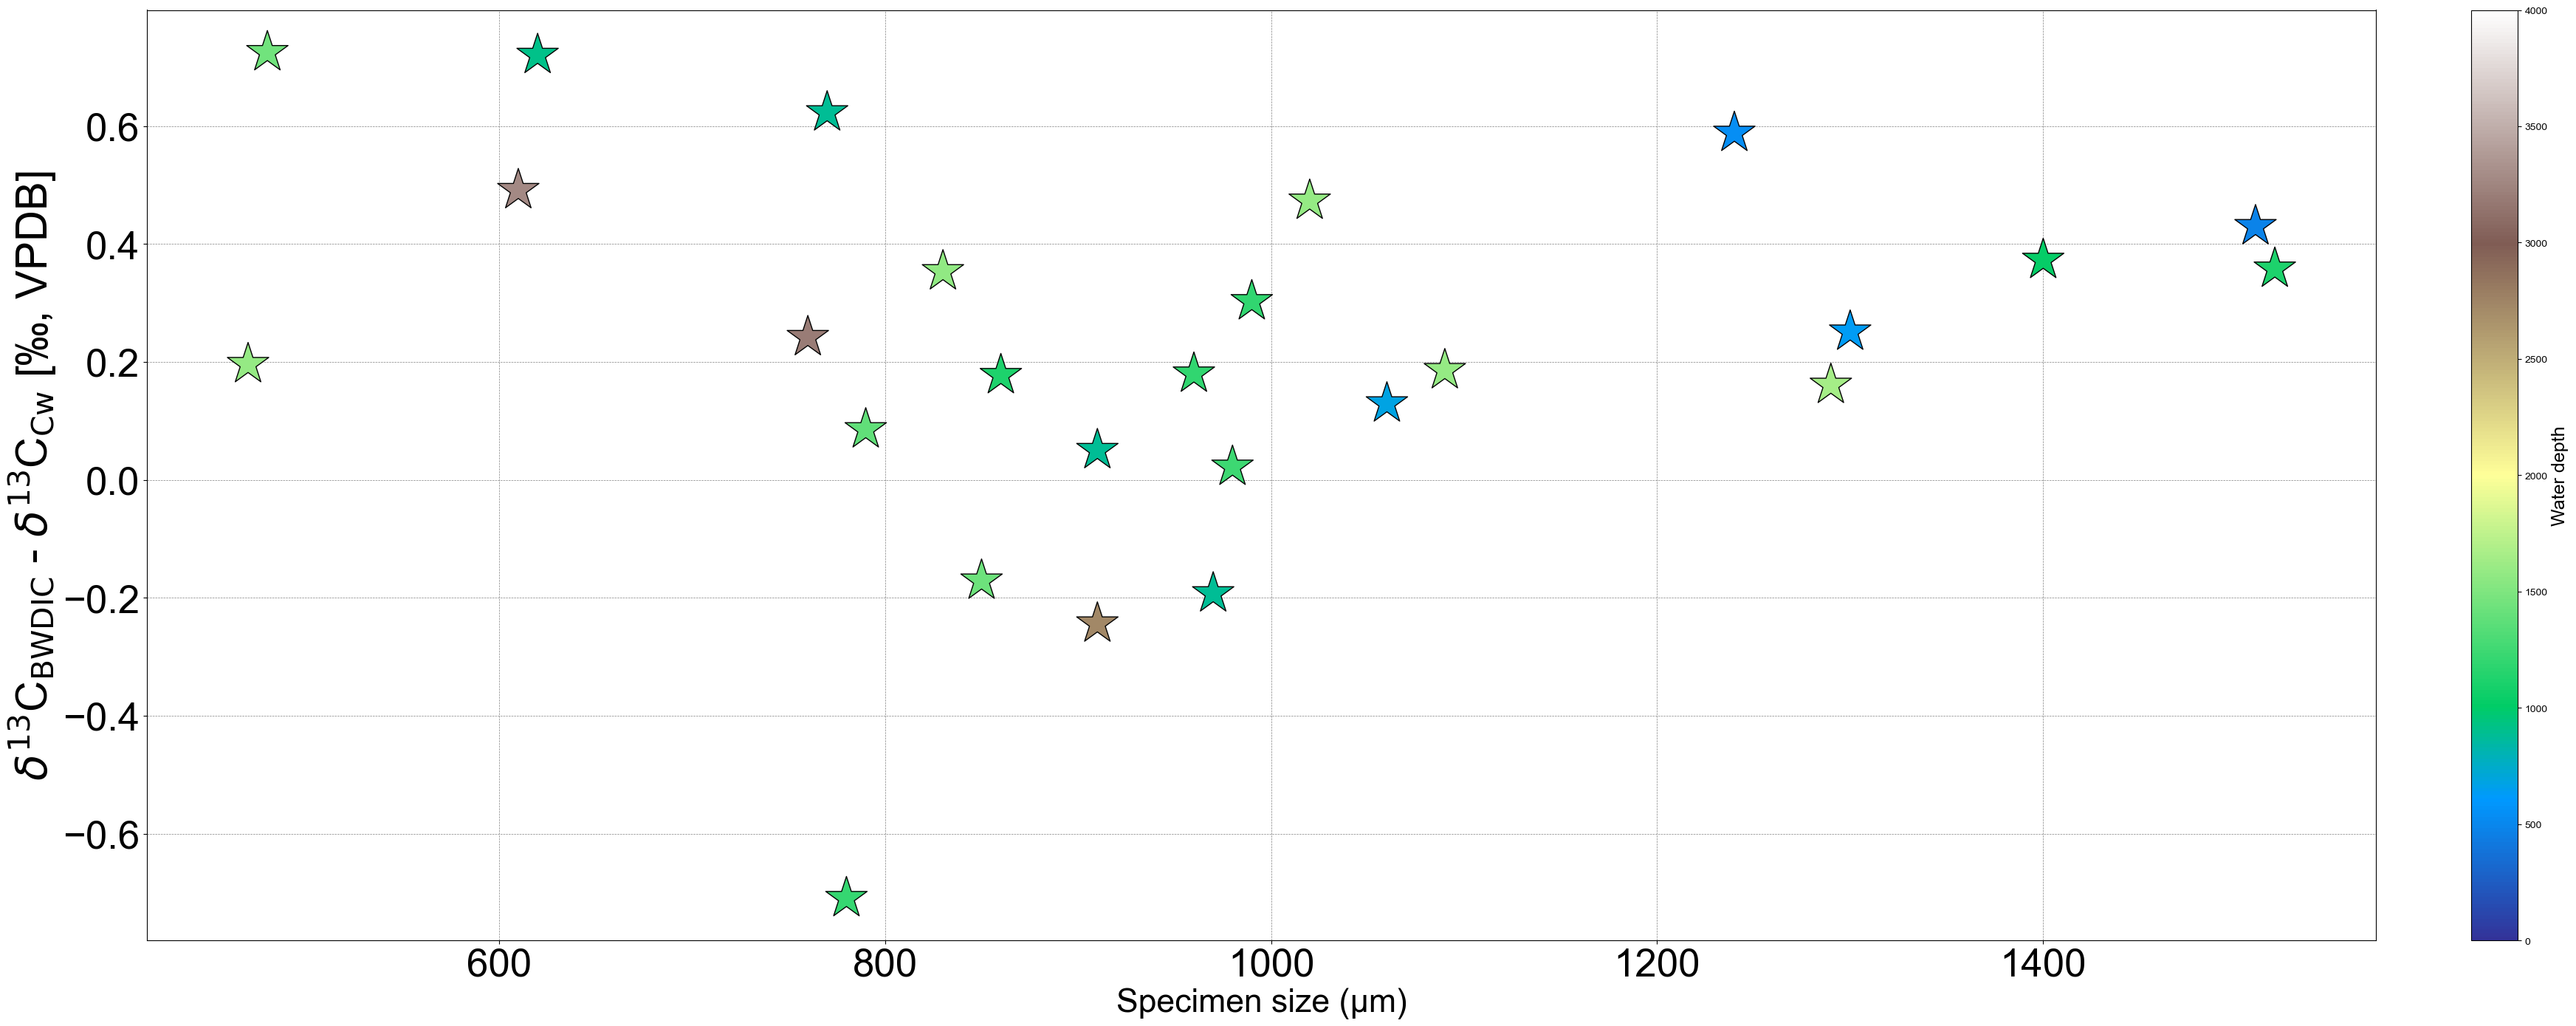

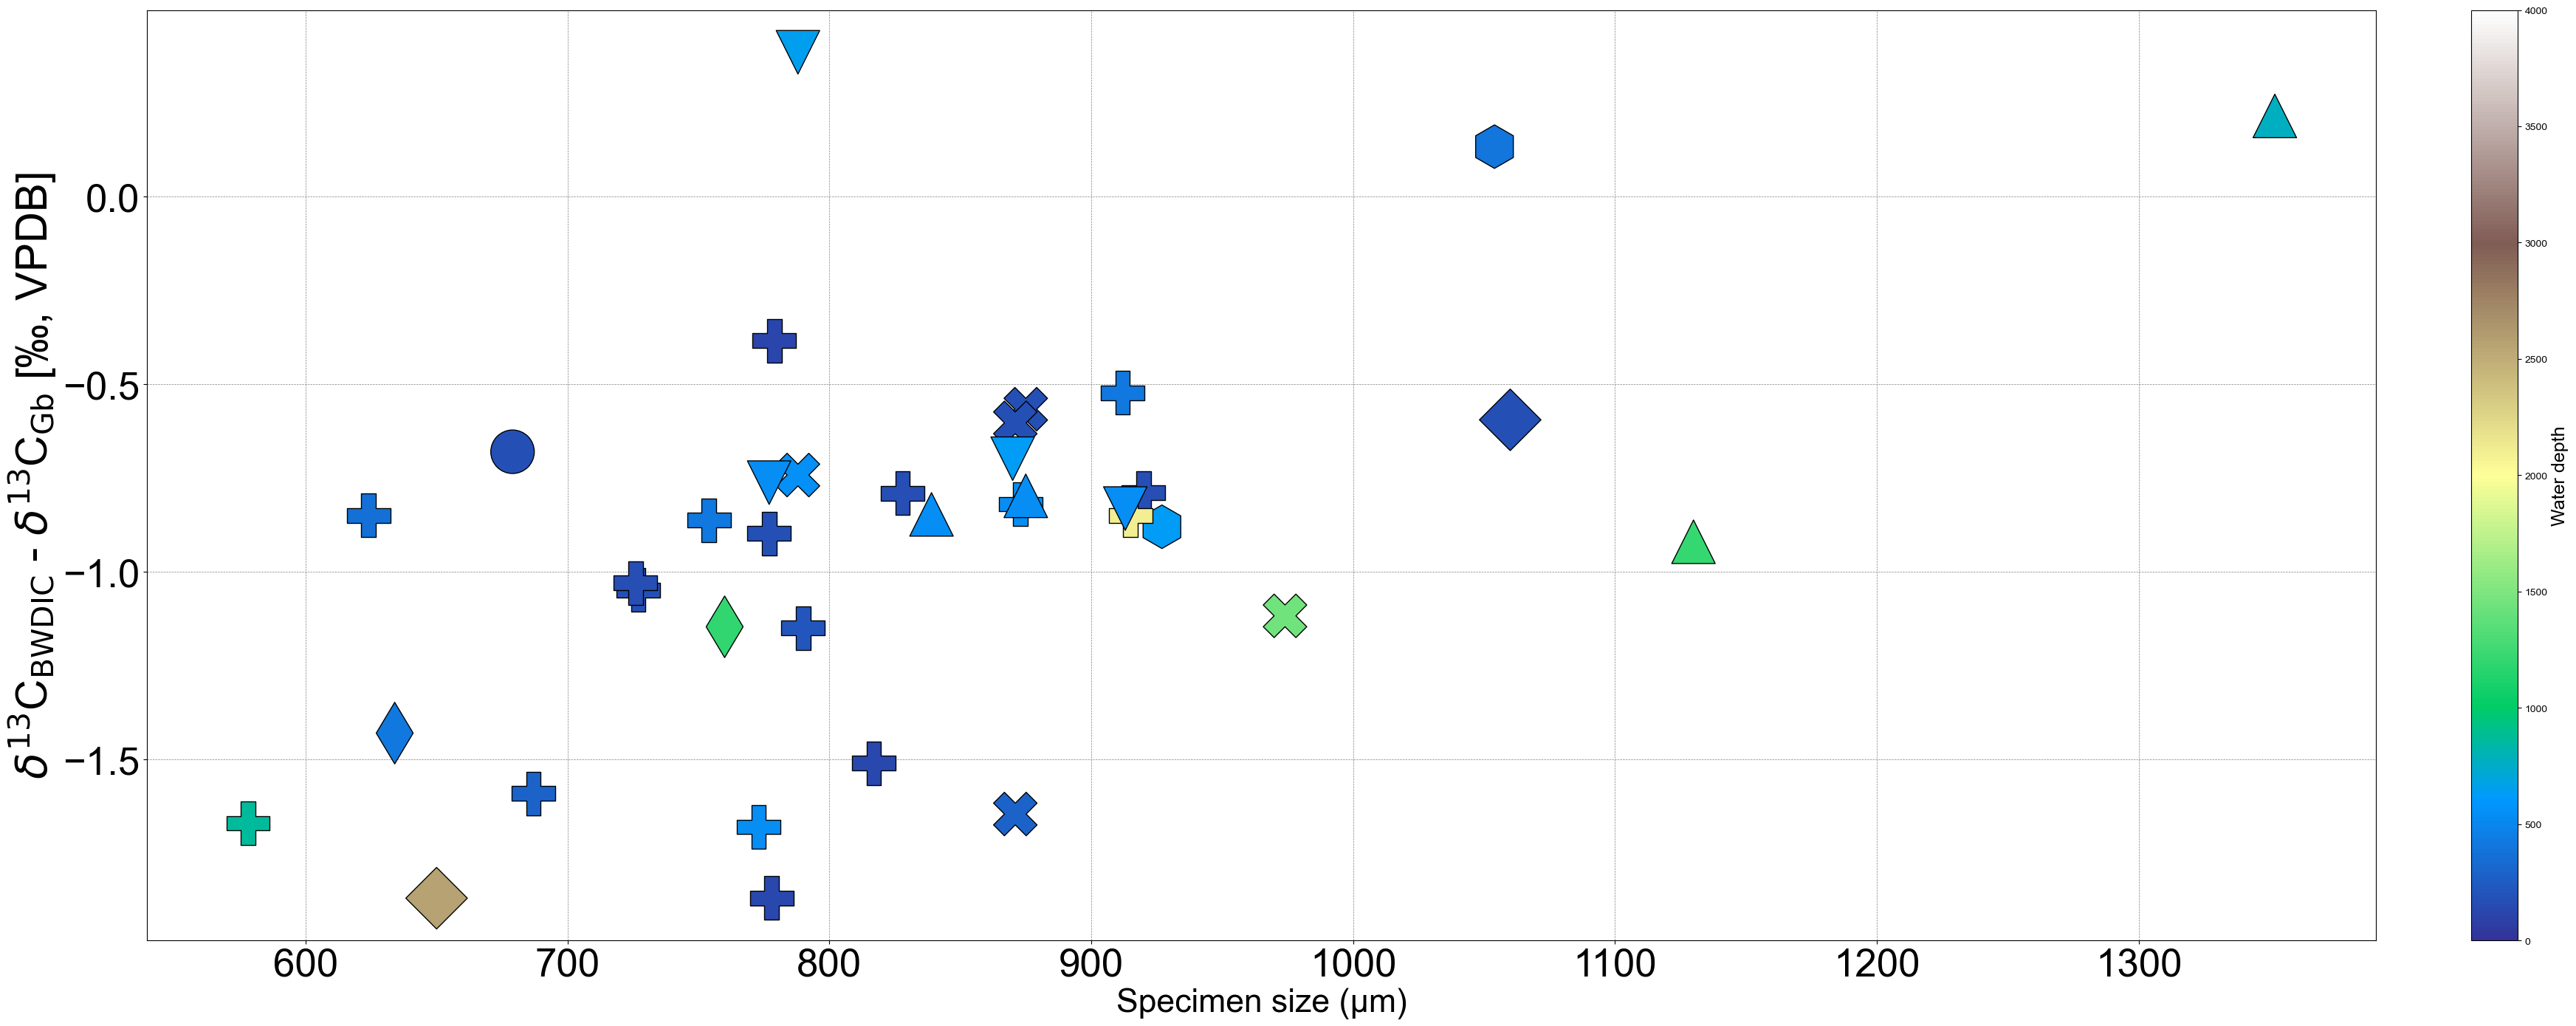

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')

# Convert 'd13C VPDB corr' column to numeric, coercing any errors to NaN
df['d13C VPDB corr'] = pd.to_numeric(df['d13C VPDB corr'], errors='coerce')

# Drop rows where 'd13C VPDB corr' has NaNs
df.dropna(subset=['d13C VPDB corr'], inplace=True)
df = df[df['Interglacial/glacial'] == 'Interglacial']

# Filter the DataFrame to only include rows for 'Cibicidoides wuellerstorfi'
cw_data = df[df['Species'] == 'Cibicidoides wuellerstorfi']

# Normalize the 'Water depth' column to get colors
norm = plt.Normalize(0, 4000)
cmap = plt.cm.terrain

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Check if the necessary columns exist in the DataFrame
if 'Specimen size' in df.columns and 'd13C VPDB corr' in df.columns and 'Species' in df.columns:

    # Calculate the difference between 'd13c_dic_h2022' and 'd13C VPDB corr'
    difference = cw_data['d13C VPDB corr'] - cw_data['d13c_dic_h2022']
    
    # Create the plot
    plt.figure(figsize=(35, 14))  # Making the figure a bit larger to accommodate the legend

    # Plot the difference with specific marker and color based on 'Water depth'
    plt.scatter(
        cw_data['Specimen size'], 
        difference, 
        c=cw_data['Water depth'], 
        cmap=cmap, 
        marker='*',  # Star marker
        s=1800, 
        zorder=15,
        label='Cibicidoides wuellerstorfi',
        edgecolor='black',  # Adding edgecolor to make shapes more distinguishable
        norm=norm  # Ensure the normalization is applied here
    )

    # Add title and labels
    plt.xlabel('Specimen size (μm)', fontsize=32)
    plt.ylabel(r'$\delta^{13}$C$_{\mathrm{BW DIC}}$ - $\delta^{13}$C$_{\mathrm{Cw}}$ [‰, VPDB]', fontsize=42)
    plt.tick_params(axis='both', labelsize=38)

    # Create custom legend handles for shapes
    custom_lines = [Line2D([0], [0], marker='*', color='w', markerfacecolor='gray', markersize=15, label='Cibicidoides wuellerstorfi')]

    # Create a colorbar with the proper normalization
    cbar = plt.colorbar(norm=norm, cmap=cmap, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Water depth', fontsize=18)

    # Add grid
    plt.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')

    # Adjust the layout to make room for the legend
    plt.tight_layout()

 
    # Show the plot
    plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the CSV file into a Pandas DataFrame
file_path = 'Datasets/Created datasets/SI dataset with d18Oeq.csv'
df = pd.read_csv(file_path)

# Convert 'd13C VPDB corr' column to numeric, coercing any errors to NaN
df['d13C VPDB corr'] = pd.to_numeric(df['d13C VPDB corr'], errors='coerce')
df = df[df['Interglacial/glacial'] == 'Interglacial']

# Drop rows where 'd13C VPDB corr' has NaNs
df.dropna(subset=['d13C VPDB corr'], inplace=True)

# Filter the DataFrame to only include rows for Globobulimina spp. and Praeglobobulimina spinescens
globobuliminids = df[df['Species'].str.contains('Globobulimina|Praeglobobulimina', na=False)]

# Create a dictionary to map species to different marker styles
species_markers = {
    'Globobulimina spp.': 'h',           # Hexagon
    'Globobulimina pacifica': 'd',       # Diamond
    'Globobulimina spp. pacifica': 'D',  # Filled Diamond
    'Globobulimina auriculata': 'P',     # Plus
    'Globobulimina spp. auriculata': 'X',# Cross
    'Globobulimina affinis': 'v',        # Triangle down
    'Globobulimina spp. affinis': '^',   # Triangle up
    'Globobulimina turgida': 'o',        # Circle
    'Praeglobobulimina spinescens': 's', # Square
}

# Normalize the 'Water depth' column to get colors
norm = plt.Normalize(0, 4000)
cmap = plt.cm.terrain

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Check if the necessary columns exist in the DataFrame
if 'Specimen size' in df.columns and 'd13C VPDB corr' in df.columns and 'Species' in df.columns:

    # Create the plot
    plt.figure(figsize=(35, 14))  # Making the figure a bit larger to accommodate the legend

    # Plot each globobuliminid species with a specific marker and color based on 'Water depth'
    for species, marker in species_markers.items():
        species_data = globobuliminids[globobuliminids['Species'] == species]
        
        # Calculate the difference between bottom water δ13C and Globobulimina δ13C
        difference =  species_data['d13C VPDB corr'] - species_data['d13c_dic_h2022']
        
        plt.scatter(
            species_data['Specimen size'], 
            difference, 
            c=species_data['Water depth'], 
            cmap=cmap, 
            marker=marker, 
            s=1800, 
            zorder=15,
            label=species,
            edgecolor='black',  # Adding edgecolor to make shapes more distinguishable
            norm=norm  # Ensure the normalization is applied here
        )

    # Add title and labels
    plt.xlabel('Specimen size (μm)', fontsize=32)
    plt.ylabel(r'$\delta^{13}$C$_{\mathrm{BW DIC}}$ - $\delta^{13}$C$_{\mathrm{Gb}}$ [‰, VPDB]', fontsize=42)
    plt.tick_params(axis='both', labelsize=38)

    # Create custom legend handles for shapes
    custom_lines = [Line2D([0], [0], marker=m, color='w', markerfacecolor='gray', markersize=15, label=s) 
                    for s, m in species_markers.items()]

    # Add the custom legend to the plot
    #plt.legend(handles=custom_lines, bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., fontsize=20)

    # Create a colorbar with the proper normalization
    cbar = plt.colorbar(norm=norm, cmap=cmap, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Water depth', fontsize=18)
    #cbar.ax.tick_params(labelsize=16)

    # Add grid
    plt.grid(True, color='grey', linestyle='--', linewidth=0.5, which='both')

    # Adjust the layout to make room for the legend
    plt.tight_layout()
     
    # Show the plot
    plt.show()


## Statistical Analysis: PCA and Heatmaps for environmental parameters

#### This code gives the chance to select different water depths and bottom water dissolved oxygen ranges:

- It's predetermined like this: you just need to comment (#) the ranges you WON'T need and leave uncommented the range you will need.
- The code is set now for water depths> 1000 m, with no oxygen filter. You can pick the depths and oxygen content you want.

#### Also the code gives the chance to select the bottom water environmental or bulk sediment parameters you want to evaluate here.


##### Here, you can see the variables. In the code, the bulk sediment variables are commented, which means that if you run the code now, they won't be included in the PCA. 
- Update the list of columns to include these new offset columns

##### This part of the code depends on the previous one (columns_of_interest), as this one assigns names and labels to the variables when plotting the PCA. Don't change the order of any of the variables.

NaN values in each column:
oxygen_h2023                  0
NO3umol/Kg                    0
CO3_h2023                     0
pH_25NBS_DIVA_40*30           0
seawifs_npp_cbpm_all_mean     0
difference_cw                 8
difference_gb                70
dtype: int64


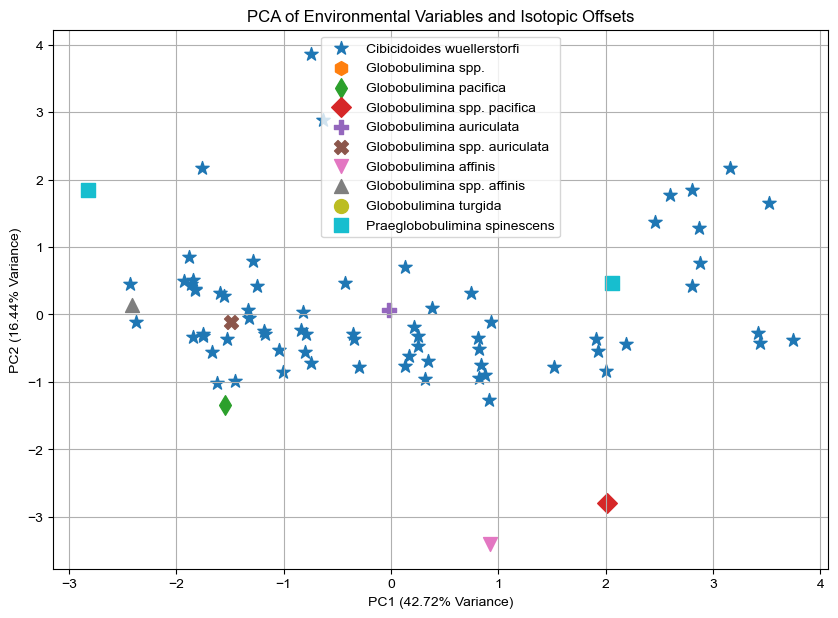

Explained variance ratio by each principal component: [0.42720595 0.16436834]


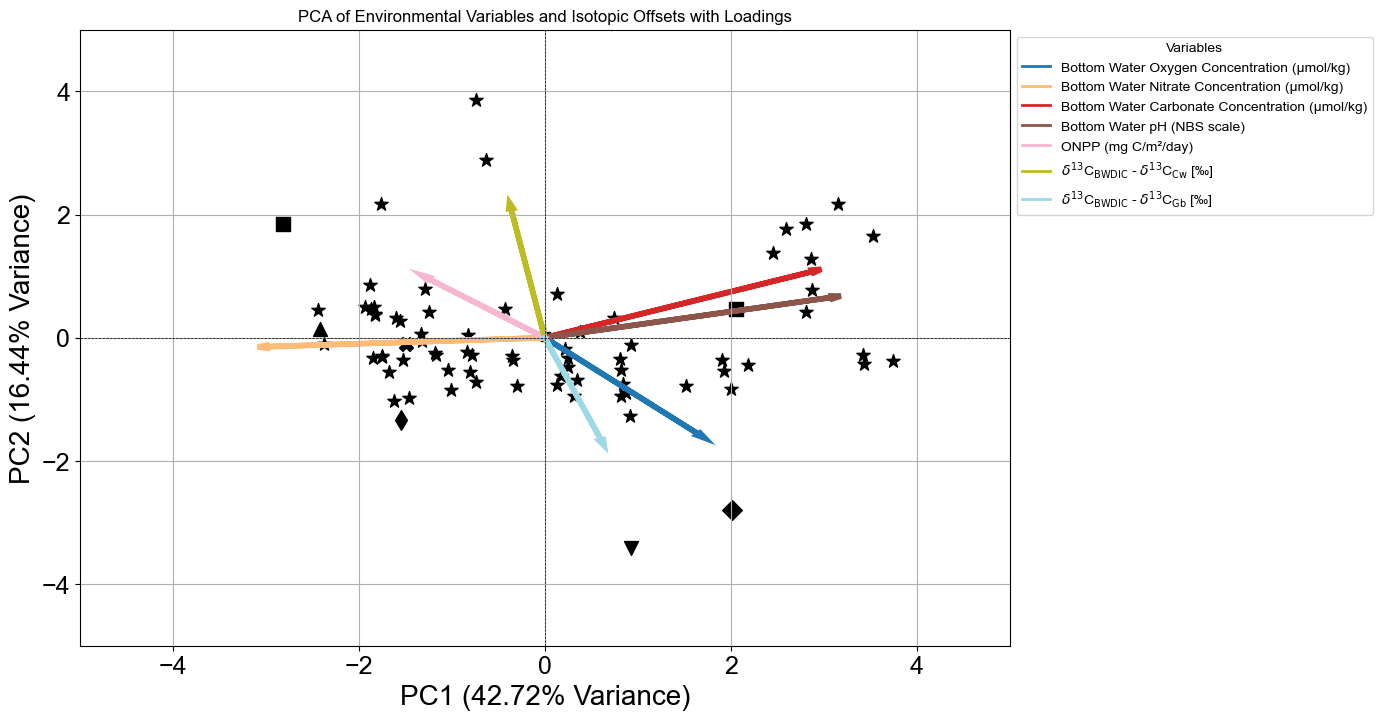

ARROWS Explained variance ratio by each principal component: [0.42720595 0.16436834]
The scaling factor for the loading arrows is: 3.227226408986368
(78, 36)
(78, 2)
        PC1       PC2                     Species
0  3.743651 -0.379209  Cibicidoides wuellerstorfi
1  3.525296  1.651559  Cibicidoides wuellerstorfi
2  2.000879 -0.834669  Cibicidoides wuellerstorfi
3  0.841643 -0.747590  Cibicidoides wuellerstorfi
4  0.816757 -0.516142  Cibicidoides wuellerstorfi
Explained variance ratio: [0.42720595 0.16436834]


In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 

# Load the merged data into a DataFrame
df = pd.read_csv('Stable Isotope Dataset SEP Carbon Gradient.csv')
# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Filter for interglacial periods as done in previous analyses
df = df[df['Interglacial/glacial'] == 'Interglacial']

#df = df[df['Water depth'] < 500]
#df = df[(df['Water depth'] > 500) & (df['Water depth'] < 1000)]
#df = df[(df['Water depth'] > 1000) & (df['Water depth'] < 2000)]
#df = df[df['Water depth'] > 2000]
df = df[df['Water depth'] > 1000]

#df = df[df['oxygen_h2023'] < 50]
#df = df[(df['oxygen_h2023'] > 50) & (df['oxygen_h2023'] < 100)]
#df = df[df['oxygen_h2023'] > 100]
#df = df[df['oxygen_h2023'] > 50]

# Calculate the offsets only for the relevant species and take the absolute value
df['difference_cw'] = df.apply(lambda row: abs(row['d13c_dic_h2022'] - row['d13C VPDB corr'])
                               if row['Species'] == 'Cibicidoides wuellerstorfi' else np.nan, axis=1)

# For difference_gb, include all relevant Globobulimina and Praeglobobulimina species and take the absolute value
df['difference_gb'] = df.apply(lambda row: abs(row['d13c_dic_h2022'] - row['d13C VPDB corr'])
                               if any(substring in row['Species'] for substring in ['Globobulimina', 'Praeglobobulimina']) else np.nan, axis=1)

# Update the list of columns to include these new offset columns
columns_of_interest = [
    'oxygen_h2023', 
    'NO3umol/Kg',  # <-- Fixed missing comma
    'CO3_h2023', 
    'pH_25NBS_DIVA_40*30', 
    #'Corg-korr', 
    #'CaCO3', 
    #'Opalgehalt', 
    #'C/Nentk',
    'seawifs_npp_cbpm_all_mean',
    'difference_cw',  # Offset for C. wuellerstorfi
    'difference_gb'   # Offset for Globobulimina and Praeglobobulimina
]

# Check for NaN values in each column
nan_counts = df[columns_of_interest].isna().sum()
print("NaN values in each column:")
print(nan_counts)

# Decide how to handle missing values:
# Option 1: Drop columns with too many NaNs
# threshold = len(df) * 0.5  # Example threshold: drop columns with more than 50% missing data
# df_pca = df[columns_of_interest].drop(columns=nan_counts[nan_counts > threshold].index).dropna()

# Option 2: Impute missing values with the median (or another strategy)
df_pca = df[columns_of_interest].fillna(df[columns_of_interest].median())

# Standardize the data
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Perform PCA
pca = PCA(n_components=2)  # We can start with 2 components for visualization
principal_components = pca.fit_transform(df_pca_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the species column back for reference
pca_df['Species'] = df['Species'].values

# Create a dictionary to map species to different marker styles
species_markers = {
    'Cibicidoides wuellerstorfi': '*',   # Star
    'Globobulimina spp.': 'h',           # Hexagon
    'Globobulimina pacifica': 'd',       # Diamond
    'Globobulimina spp. pacifica': 'D',  # Filled Diamond
    'Globobulimina auriculata': 'P',     # Plus
    'Globobulimina spp. auriculata': 'X',# Cross
    'Globobulimina affinis': 'v',        # Triangle down
    'Globobulimina spp. affinis': '^',   # Triangle up
    'Globobulimina turgida': 'o',        # Circle
    'Praeglobobulimina spinescens': 's', # Square
}

# Plotting the PCA results with species markers
plt.figure(figsize=(10, 7))
for species, marker in species_markers.items():
    species_data = pca_df[pca_df['Species'] == species]
    plt.scatter(species_data['PC1'], species_data['PC2'], label=species, marker=marker, s=100)

plt.title('PCA of Environmental Variables and Isotopic Offsets')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Display the explained variance ratio
print("Explained variance ratio by each principal component:", pca.explained_variance_ratio_)


import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the initial variable labels
variable_labels = {
    'oxygen_h2023': 'Bottom Water Oxygen Concentration (µmol/kg)',
    'NO3umol/Kg': 'Bottom Water Nitrate Concentration (µmol/kg)',
    'CO3_h2023': 'Bottom Water Carbonate Concentration (µmol/kg)',
    'pH_25NBS_DIVA_40*30': 'Bottom Water pH (NBS scale)',
    #'Corg-korr': 'Total organic carbon (TOC)', 
    #'CaCO3': 'Calcium carbonate content', 
    #'Opalgehalt': 'Biogenic opal', 
    #'C/Nentk': 'C:N ratio',
    'seawifs_npp_cbpm_all_mean': 'ONPP (mg C/m²/day)',
    'difference_cw': r'$\delta^{13}$C$_{\mathrm{BW DIC}}$ - $\delta^{13}$C$_{\mathrm{Cw}}$ [‰]',
    'difference_gb': r'$\delta^{13}$C$_{\mathrm{BW DIC}}$ - $\delta^{13}$C$_{\mathrm{Gb}}$ [‰]'
}

# Step 2: Define a consistent color map for the initial variables using tab20
colors = plt.cm.tab20(np.linspace(0, 1, len(variable_labels)))

# Map the initial variables to these colors
color_map = {list(variable_labels.keys())[i]: colors[i] for i in range(len(variable_labels))}

# Calculate the PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Ensure that the length of variable_labels matches the number of columns in loadings
if len(variable_labels) != loadings.shape[0]:
    raise ValueError(f"The number of variables in variable_labels ({len(variable_labels)}) must match the number of loadings from PCA ({loadings.shape[0]}).")

# Scale the loadings to make the arrows larger and more comparable to the range of the dots
scaling_factor = 0.8 * np.max(np.abs(principal_components)) / np.max(np.abs(loadings))
scaled_loadings = loadings * scaling_factor

# Plotting the PCA results with species markers
plt.figure(figsize=(12, 8))
for species, marker in species_markers.items():
    species_data = pca_df[pca_df['Species'] == species]
    plt.scatter(species_data['PC1'], species_data['PC2'], 
                color='black', label=species, marker=marker, s=100)

# Plot the loadings as arrows with correct labels
for i, var in enumerate(variable_labels.keys()):
    plt.arrow(0, 0, scaled_loadings[i, 0], scaled_loadings[i, 1], 
              color=color_map[var], alpha=1, head_width=0.05, head_length=0.1, linewidth=4)

# Set the x and y limits between -5 and 5
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Species", fontsize=10)

plt.title('PCA of Environmental Variables and Isotopic Offsets with Loadings')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)', fontsize=20)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)', fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', labelsize=18)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Add legend for the arrows
arrow_labels = [plt.Line2D([0], [0], color=color_map[var], lw=2) for var in variable_labels.keys()]
plt.legend(arrow_labels, list(variable_labels.values()), loc='upper left', bbox_to_anchor=(1, 1), title="Variables", fontsize=10)

plt.show()

# Display the explained variance ratio
print("ARROWS Explained variance ratio by each principal component:", pca.explained_variance_ratio_)
print(f"The scaling factor for the loading arrows is: {scaling_factor}")
print(df.shape)
print(principal_components.shape)
print(pca_df.head())
print("Explained variance ratio:", pca.explained_variance_ratio_)

#### This part of the code will generate a Spearman Heatmap. Consider that this is set only for bottom water environmental variables. Not for bulk sediment (as the dataset for this is considerably smaller). So, be aware if you want to run the Heatmap, you need to set only environmental variables in the previous code (for PCA), and to leave the bulk sediment parameters commented (# at the beginning).

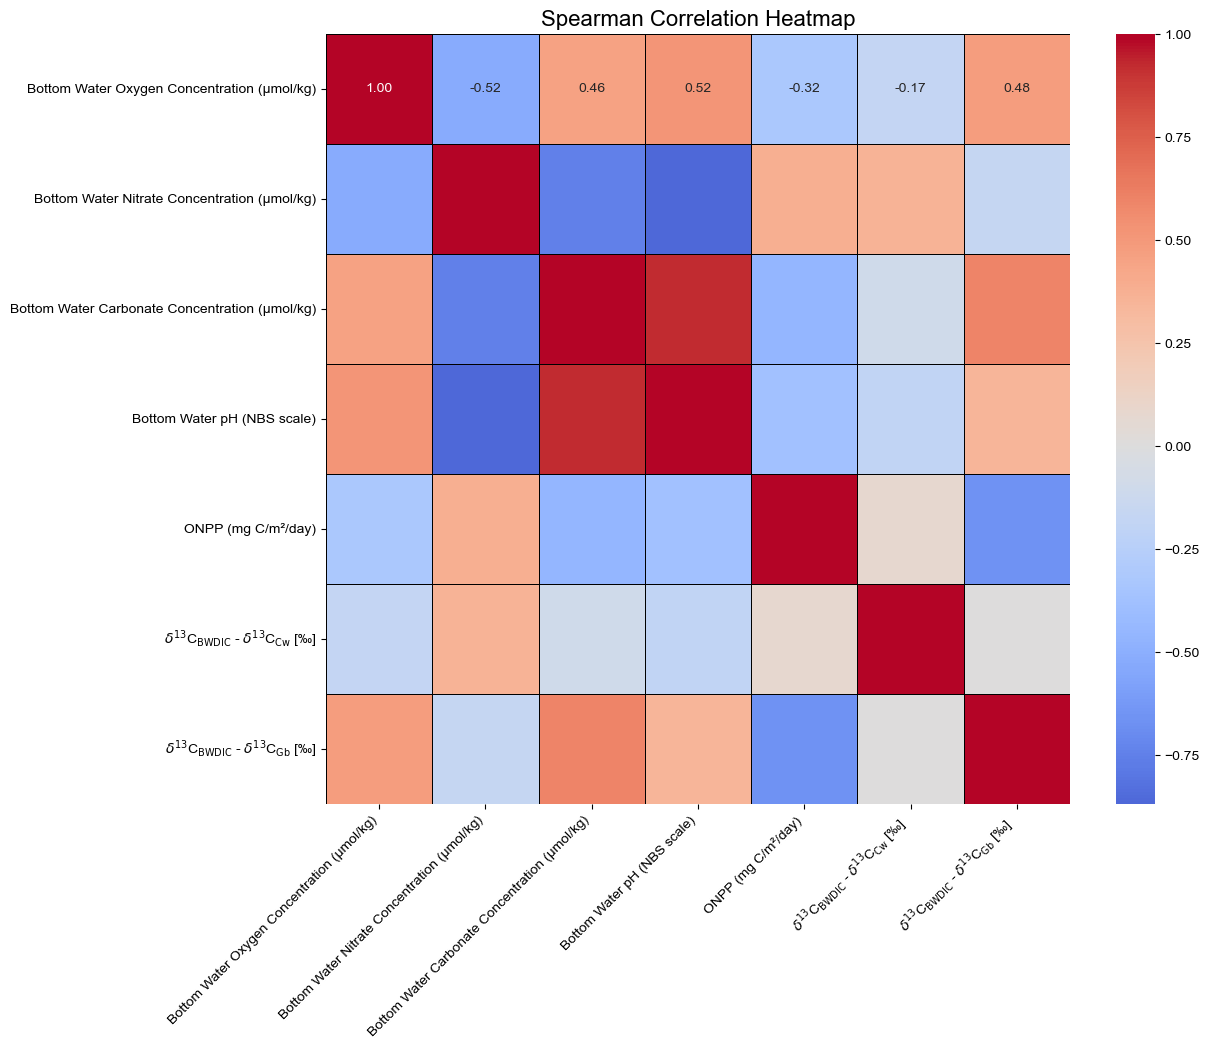

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the nice labels for the columns
variable_labels = {
    'oxygen_h2023': 'Bottom Water Oxygen Concentration (µmol/kg)',
    'NO3umol/Kg': 'Bottom Water Nitrate Concentration (µmol/kg)',
    'CO3_h2023': 'Bottom Water Carbonate Concentration (µmol/kg)',
    'pH_25NBS_DIVA_40*30': 'Bottom Water pH (NBS scale)',
    'seawifs_npp_cbpm_all_mean': 'ONPP (mg C/m²/day)',
    'difference_cw': r'$\delta^{13}$C$_{\mathrm{BW DIC}}$ - $\delta^{13}$C$_{\mathrm{Cw}}$ [‰]',
    'difference_gb': r'$\delta^{13}$C$_{\mathrm{BW DIC}}$ - $\delta^{13}$C$_{\mathrm{Gb}}$ [‰]'
}

# Replace df and columns_of_interest with your actual DataFrame and column list
corr_matrix = df[columns_of_interest].corr(method='spearman')

# Check for NaN values in the correlation matrix and fill with zeros
corr_matrix = corr_matrix.fillna(0)

# Rename the columns and index of the correlation matrix using the nice labels
corr_matrix = corr_matrix.rename(index=variable_labels, columns=variable_labels)

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0, 
    #annot_kws={"size": 10, "weight": "bold", "va": "center", "ha": "center", "color": "black"},
    cbar=True,
    linewidths=0.5, 
    linecolor='black'
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add a title to the heatmap
plt.title('Spearman Correlation Heatmap', fontsize=16)

plt.show()